## Preguntas a responder

14. Que impacto tiene la duracion de la promocion en el volumen de ventas?
Realizar una comparación entre las ventas y la duración de la promoción, es decir, si la promoción duró más se produjeron más ventas? Esto es un poco complicado porque imagino que de acuerdo al % de descuento puede variar.
15. Relación id_cadena con id_producto, ver que productos vende más una cadena en particular.
16. Con respecto a latitud y longitud, se puede hacer un gráfico que relacione la ubicación con las ventas por ejemplo, para ver si hay alguna zona donde se produzcan más ventas que otras.
17. Cuando se vende mas un producto cuando tiene promociones o cuando no tiene promociones?  Relacionar las ventas del producto si tiene promocion y cuando no tiene promocion.
18. Cuales productos no se venden asi tengan una promocion?
19. Cantidad de inventario de productos que mas se venden?
20. Cantidad de inventario del producto que menos se vende?

In [2]:
# Importamos las librerías:
import matplotlib.pyplot as plt
plt.style.use('seaborn')
# Línea necesaria para que Matplotlib muestre por defecto los gráficos en nuestro Notebook:
%matplotlib inline
import numpy as np
import pandas as pd
import seaborn as sns
from datetime import datetime

C:\Users\ro424\AppData\Local\Temp\ipykernel_9484\3487291681.py:3: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


In [3]:
datos="D:/Desodorantes/deodorants_final_merged_v1.csv"
df = pd.read_csv(datos, low_memory=False)

In [10]:
df.head(5)

,idb,id_producto,fecha_trans,stock_unidades,venta_unidades,precio_unitario,sigue_prod_en_rol,cd_abast,mov_month,mov_year,...,local,punto_dist,desc_producto,razon_social,id_region,dia_semana,is_weekend,tiene_promo,estacion,zona
0,5205,273921,2019-07-14,7,0,157.03,1,9217,7,2019,...,1,0,freshmatic airwick lavanda repuesto 250.00 mlt,reckitt benckiser argentina s.a.,1,Sunday,1,0,verano,4
1,9026,273920,2019-07-14,18,0,157.03,1,9217,7,2019,...,1,0,refill citrico oil escence air wick citricos t...,reckitt benckiser argentina s.a.,1,Sunday,1,0,verano,4
2,5263,468735,2019-07-14,11,0,145.10,1,9217,7,2019,...,1,0,glade automatico 3 en 1 aromatizante de ambien...,s. c. johnson y son de arg. s.a.,1,Sunday,1,0,verano,4
3,9030,461280,2019-07-14,10,0,145.10,1,9217,7,2019,...,1,0,glade automatico desodorante de ambientes vain...,s. c. johnson y son de arg. s.a.,1,Sunday,1,0,verano,4
4,9159,470446,2019-07-14,2,0,145.10,1,9217,7,2019,...,1,0,glade automatico ref ed ltda 1 175gx6 pop frut...,s. c. johnson y son de arg. s.a.,1,Sunday,1,0,verano,4


In [4]:
df.describe()

,idb,id_producto,stock_unidades,venta_unidades,precio_unitario,sigue_prod_en_rol,cd_abast,mov_month,mov_year,mov_weekday,...,nro_prom,duracion_promo,id_cadena,longitud,latitud,local,punto_dist,id_region,is_weekend,tiene_promo
count,8.356436e+06,8.356436e+06,8.356436e+06,8.356436e+06,8.356436e+06,8.356436e+06,8.356436e+06,8.356436e+06,8.356436e+06,8.356436e+06,...,8.356436e+06,8.356436e+06,8.356436e+06,8.356436e+06,8.356436e+06,8.356436e+06,8.356436e+06,8.356436e+06,8.356436e+06,8.356436e+06
mean,6.989773e+03,3.785508e+05,2.065137e+01,3.136310e-01,6.423475e+01,9.610200e-01,5.434609e+03,6.485025e+00,2.017666e+03,3.002266e+00,...,7.780377e+03,1.485333e-01,4.277160e+00,-5.872835e+01,-3.506354e+01,9.897948e-01,1.020519e-02,9.283848e-01,2.866340e-01,1.630815e-02
std,3.299906e+03,9.158304e+04,1.487243e+02,8.953579e-01,6.580358e+01,1.935474e-01,4.533852e+03,3.453803e+00,9.815391e-01,2.000099e+00,...,6.063741e+04,1.240366e+00,2.618480e+00,1.394684e+00,2.036040e+00,1.005039e-01,1.005039e-01,2.578497e-01,4.521891e-01,1.266578e-01
min,2.420000e+02,1.641460e+05,-5.420000e+02,-4.500000e+01,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,2.016000e+03,0.000000e+00,...,0.000000e+00,0.000000e+00,2.000000e+00,-6.749604e+01,-4.587265e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,5.208000e+03,2.929450e+05,6.000000e+00,0.000000e+00,2.251000e+01,1.000000e+00,0.000000e+00,3.000000e+00,2.017000e+03,1.000000e+00,...,0.000000e+00,0.000000e+00,2.000000e+00,-5.869611e+01,-3.498957e+01,1.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00
50%,9.026000e+03,4.152680e+05,1.000000e+01,0.000000e+00,3.823000e+01,1.000000e+00,9.217000e+03,6.000000e+00,2.018000e+03,3.000000e+00,...,0.000000e+00,0.000000e+00,4.000000e+00,-5.846482e+01,-3.462789e+01,1.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00
75%,9.159000e+03,4.583930e+05,1.700000e+01,0.000000e+00,7.673000e+01,1.000000e+00,9.217000e+03,1.000000e+01,2.018000e+03,5.000000e+00,...,0.000000e+00,0.000000e+00,4.000000e+00,-5.839790e+01,-3.457732e+01,1.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00
max,9.977000e+03,5.113260e+05,1.621800e+04,6.120000e+02,4.238100e+02,1.000000e+00,9.217000e+03,1.200000e+01,2.019000e+03,6.000000e+00,...,5.410660e+05,1.800000e+01,9.000000e+00,-5.668353e+01,-2.914198e+01,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00


#### 14. Qué impacto tiene la duración de la promoción en el volumen de ventas?
Realizar una comparación entre las ventas y la duración de la promoción, es decir, si la promoción duró más se produjeron más ventas? 

In [4]:
df_promo_venta = df.groupby('duracion_promo', as_index= False)['venta_unidades'].mean()
df_promo_ventas=df_promo_venta[df_promo_venta['duracion_promo']>0]
df_promo_ventas

,duracion_promo,venta_unidades
1,3,0.535714
2,4,0.425000
3,6,0.619138
4,7,0.535737
5,8,0.410474
6,9,0.590332
7,10,0.497192
8,11,0.828704
9,14,0.807858
10,15,0.187798


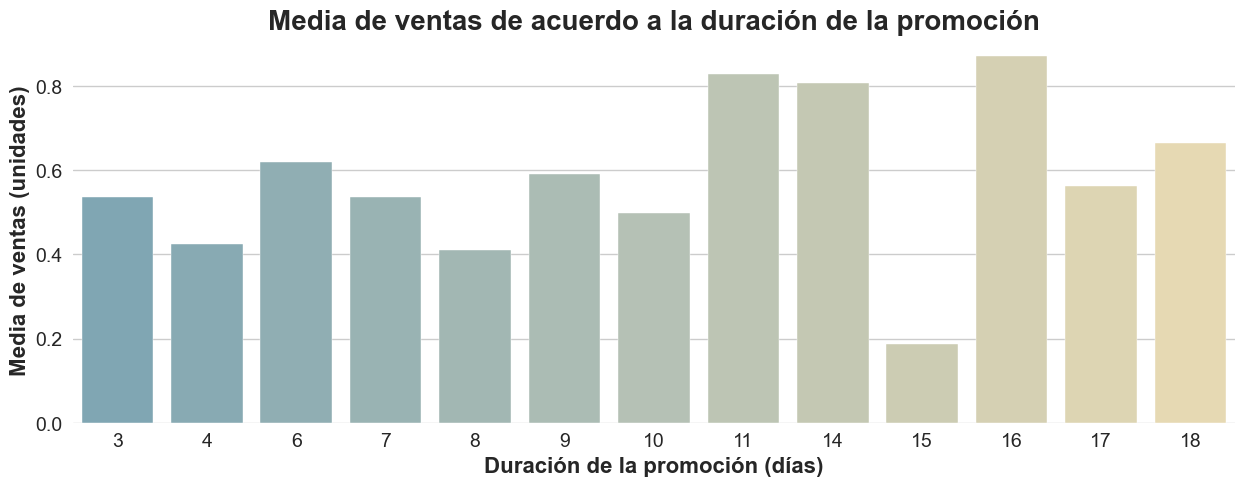

In [9]:
plt.figure(figsize=[15,5])
with sns.axes_style('whitegrid'):
    sns.barplot(x='duracion_promo', y='venta_unidades', data=df_promo_ventas, errorbar=None, palette=color)
    plt.title("Media de ventas de acuerdo a la duración de la promoción", fontsize=20, fontweight='bold')
    plt.xlabel('Duración de la promoción (días)', fontsize=16, fontweight='bold')
    plt.ylabel('Media de ventas (unidades)', fontsize=16, fontweight='bold')
    plt.xticks(fontsize=14)
    plt.yticks(fontsize=14)
    plt.savefig(f'images/Media_ventas_de_acuerdo_a_la_duración_de_la_promoción', dpi=300, bbox_inches='tight')

Después de analizar el gráfico, se puede observar que las promociones que duran 16 días registran la mayor cantidad de ventas, seguidas por las que duran 11 y 14 días.

In [7]:
# Selecciona solo las filas con promoción
df_promo = df[df['tiene_promo'] == 1]

# Agrupa los datos por duración de promoción y cuenta el número de promociones para cada duración
nro_promo_por_duracion = df_promo.groupby('duracion_promo')['nro_prom'].count()

# Agrupa los datos por duración de promoción y calcula la cantidad total de unidades vendidas para cada duración
venta_unidades_por_duracion = df_promo.groupby('duracion_promo')['venta_unidades'].mean()

# Calcula el porcentaje de ventas total que representan las ventas con promoción para cada duración
total_ventas_promo = 74011
porcentaje_ventas_promo_por_duracion = venta_unidades_por_duracion / total_ventas_promo * 100

# Agrega una columna adicional que calcule el porcentaje de promociones para cada duración
total_promo = 136270
porcentaje_promo_por_duracion = nro_promo_por_duracion / total_promo * 100

# Crea un DataFrame con los datos obtenidos y renombra las columnas
tabla = pd.concat([nro_promo_por_duracion, venta_unidades_por_duracion, porcentaje_ventas_promo_por_duracion, porcentaje_promo_por_duracion], axis=1)
tabla.columns = ['nro_promo', 'venta_unidades', 'porcentaje_ventas_promo', 'porcentaje_promo']

# Muestra la tabla resultante
print(tabla)


                nro_promo  venta_unidades  porcentaje_ventas_promo  \
duracion_promo                                                       
3                     336        0.535714                 0.000724   
4                      80        0.425000                 0.000574   
6                    3668        0.619138                 0.000837   
7                   73663        0.535737                 0.000724   
8                   15314        0.410474                 0.000555   
9                   10240        0.590332                 0.000798   
10                   7834        0.497192                 0.000672   
11                    216        0.828704                 0.001120   
14                   3487        0.807858                 0.001092   
15                   2098        0.187798                 0.000254   
16                   4386        0.870725                 0.001176   
17                  12744        0.562068                 0.000759   
18                  

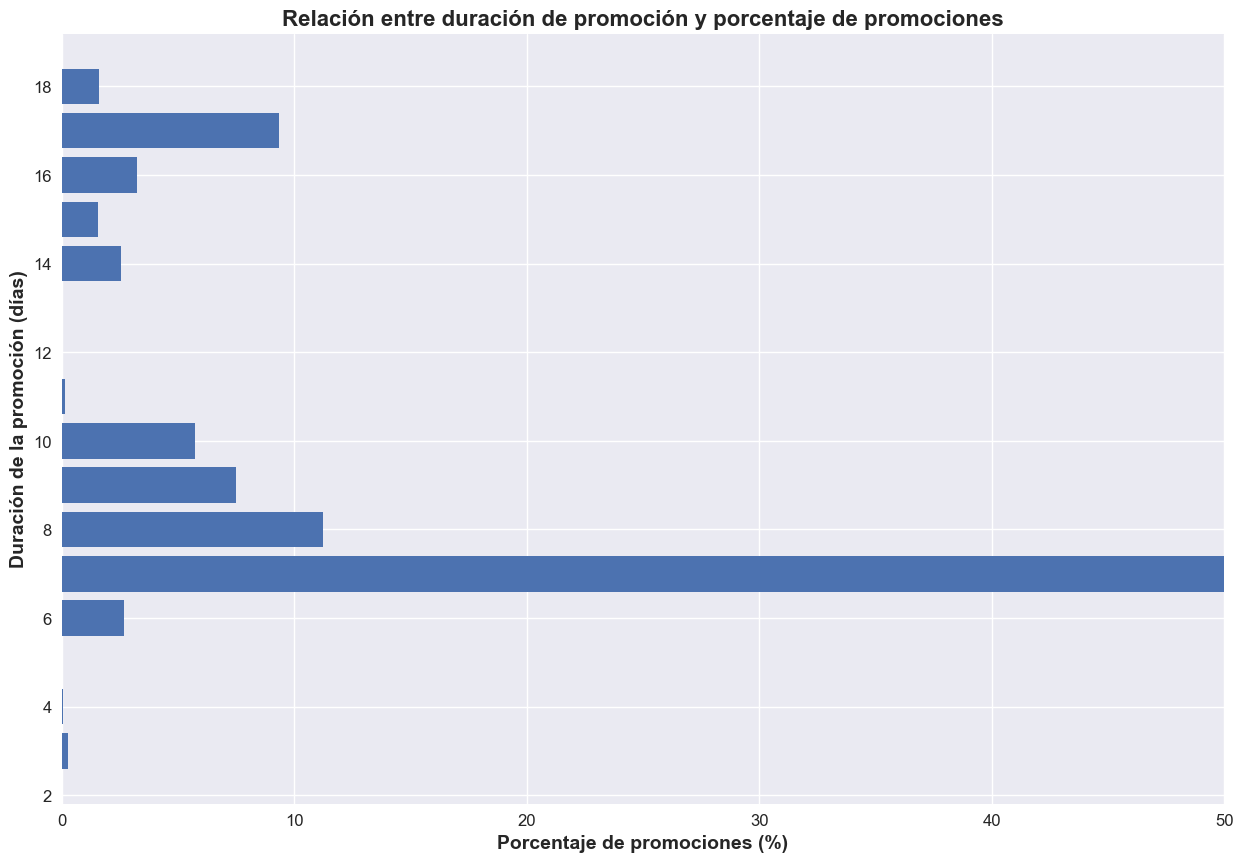

In [8]:

# Crea un gráfico de barras horizontal que muestre la relación entre duracion_promo y porcentaje_promo
fig, ax = plt.subplots(figsize=(15, 10))
ax.barh(tabla.index, tabla['porcentaje_promo'])
color = "blend:#7AB,#EDA"
sns.set_palette(sns.color_palette(color))

# Agrega etiquetas al gráfico y ajusta los límites de los ejes
ax.set_xlabel('Porcentaje de promociones (%)', fontsize=14, fontweight='bold')
ax.set_ylabel('Duración de la promoción (días)', fontsize=14, fontweight='bold')
ax.set_title('Relación entre duración de promoción y porcentaje de promociones', fontsize=16, fontweight='bold')
ax.set_xlim([0, 50])
ax.tick_params(axis='both', which='major', labelsize=12)

# Oculta la línea de borde del gráfico
for spine in ax.spines.values():
    spine.set_visible(False)

plt.savefig(f'images/Relación_entre_duración_promoción_y_porcentaje_promociones', dpi=300, bbox_inches='tight')

# Muestra el gráfico
plt.show()


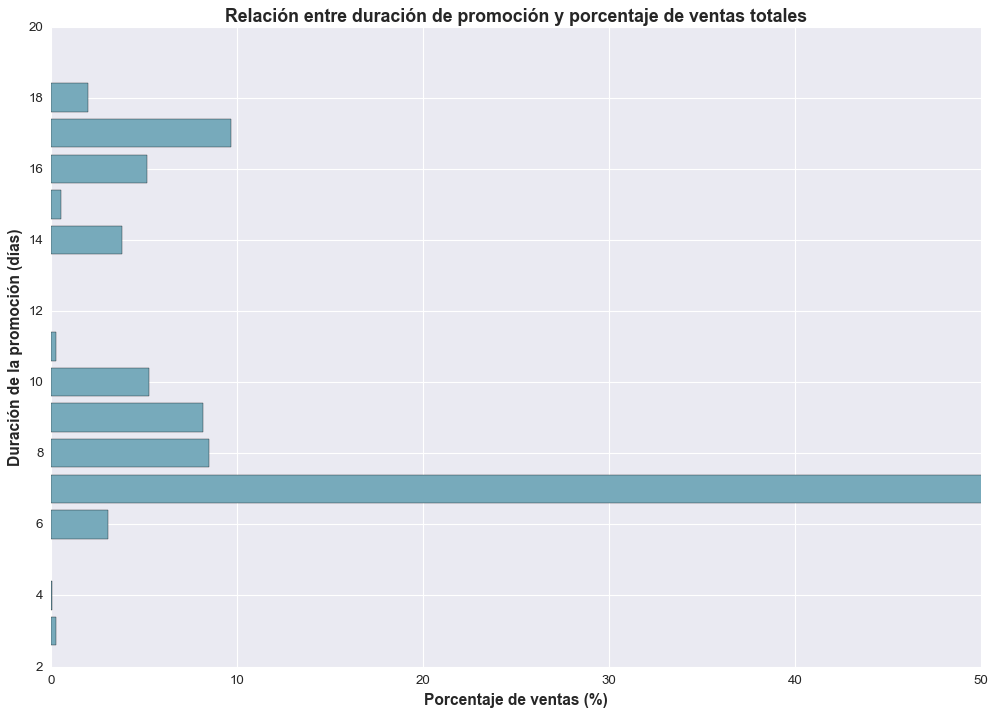

In [322]:
# Crea un gráfico de barras horizontal que muestre la relación entre duracion_promo y porcentaje_promo
fig, ax = plt.subplots(figsize=(15, 10))
ax.barh(tabla.index, tabla['porcentaje_ventas_promo'])
color = "blend:#7AB,#EDA"
sns.set_palette(sns.color_palette(color))

# Agrega etiquetas al gráfico y ajusta los límites de los ejes
ax.set_xlabel('Porcentaje de ventas (%)', fontsize=14, fontweight='bold')
ax.set_ylabel('Duración de la promoción (días)', fontsize=14, fontweight='bold')
ax.set_title('Relación entre duración de promoción y porcentaje de ventas totales', fontsize=16, fontweight='bold')
ax.set_xlim([0, 50])
ax.tick_params(axis='both', which='major', labelsize=12)

# Oculta la línea de borde del gráfico
for spine in ax.spines.values():
    spine.set_visible(False)

plt.savefig(f'images/Relación_entre_duración_promoción_y_porcentaje_ventas_totales', dpi=300, bbox_inches='tight')

# Muestra el gráfico
plt.show()

De acuerdo al gráfico obtenido, se puede observar que la mayor cantidad de ventas se producen cuando la duración de la promoción es de 7 días.

#### 15. Relación id_cadena con id_producto, ver qué cadena vende más productos.

In [10]:
# Agrupar por id_cadena e id_producto y sumar las ventas
df_productos_por_cadena = df.groupby(['desc_cadena', 'id_producto']).agg({'venta_unidades': 'sum'}).reset_index()

# Agrupar por id_cadena y sumar las ventas de todos los productos
df_ventas_por_cadena = df_productos_por_cadena.groupby(['desc_cadena']).agg({'venta_unidades': 'sum'}).reset_index()

# Ordenar en orden descendente por ventas
df_ventas_por_cadena = df_ventas_por_cadena.sort_values('venta_unidades', ascending=False)
df_ventas_por_cadena

,desc_cadena,venta_unidades
2,vea,962582
1,jumbo,881481
0,disco,777627


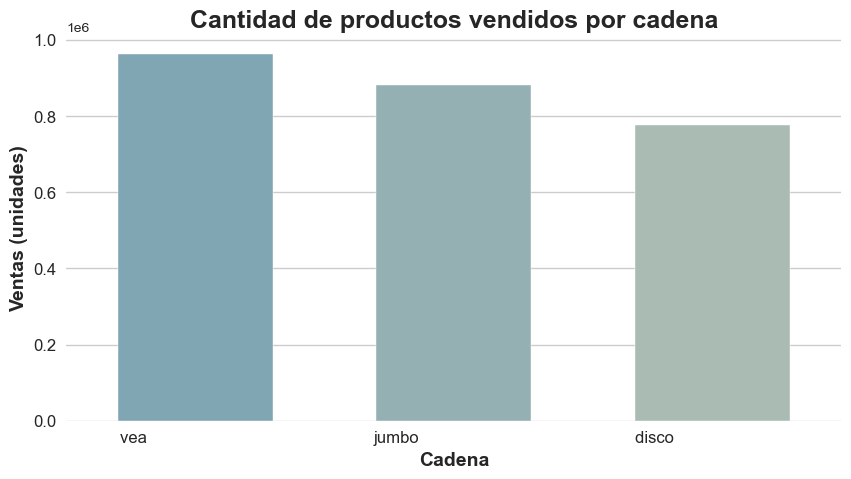

In [60]:
plt.figure(figsize=[10,5])
with sns.axes_style('whitegrid'):
    sns.barplot(x='desc_cadena', y='venta_unidades', data=df_ventas_por_cadena, errorbar=None, width=0.6)
    color = "blend:#7AB,#EDA"
    sns.set_palette(sns.color_palette(color))
    plt.title("Cantidad de productos vendidos por cadena", fontsize=18, fontweight='bold')
    plt.xlabel('Cadena', fontsize=14, fontweight='bold')
    plt.ylabel('Ventas (unidades)', fontsize=14, fontweight='bold')
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    plt.savefig(f'images/Cantidad_de_productos_vendidos_por_cadena', dpi=300, bbox_inches='tight')
   

Se puede observar que de las cinco cadenas existentes, sólo las cadenas Disco, Jumbo y Vea son las que presentan ventas productos.

#### 17. Cuándo se vende más un producto cuando tiene promociones o cuando no tiene promociones?  Relacionar las ventas del producto si tiene promoción y cuando no tiene promoción.

#### Análisis realizado para todos los productos en general

In [233]:
df_ventas_promo = df.groupby(['id_producto', 'tiene_promo']).sum()['venta_unidades'].reset_index()

# Obtener las ventas cuando tiene promoción y cuando no tiene promoción
ventas_promo = df_ventas_promo.loc[df_ventas_promo['tiene_promo'] == 1]

total_ventas_promo = ventas_promo.venta_unidades.sum()

# Obtener las ventas cuando tiene promoción y cuando no tiene promoción
ventas_promo = df_ventas_promo.loc[df_ventas_promo['tiene_promo'] == 1]
ventas_sin_promo = df_ventas_promo.loc[df_ventas_promo['tiene_promo'] == 0]

# Calcular la cantidad total de ventas para cada caso
total_ventas_promo = ventas_promo.venta_unidades.sum()
total_ventas_sin_promo = ventas_sin_promo.venta_unidades.sum()

# Imprimir los resultados
print(f"La cantidad total de ventas con promoción es {total_ventas_promo}")
print(f"La cantidad total de ventas sin promoción es {total_ventas_sin_promo}")
if (total_ventas_promo > total_ventas_sin_promo).all():
    print("Se venden más productos con promoción.")
elif (total_ventas_promo < total_ventas_sin_promo).all():
    print("Se venden más productos sin promoción.")
else:
    print("Las ventas con promoción y sin promoción son iguales.")

La cantidad total de ventas con promoción es 74011
La cantidad total de ventas sin promoción es 2547679
Se venden más productos sin promoción.


C:\Users\ro424\AppData\Local\Temp\ipykernel_31348\808845100.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_ventas_promo = df.groupby(['id_producto', 'tiene_promo']).sum()['venta_unidades'].reset_index()


In [346]:
df_ventas= df.groupby(['id_producto', 'tiene_promo'])['venta_unidades'].mean().reset_index()
df_ventas.describe()

,id_producto,tiene_promo,venta_unidades
count,167.000000,167.000000,167.000000
mean,384424.311377,0.455090,0.377265
std,95032.846509,0.499477,0.253552
min,164146.000000,0.000000,0.039914
25%,292948.500000,0.000000,0.207422
50%,421884.000000,0.000000,0.313403
75%,462447.500000,1.000000,0.471818
max,511326.000000,1.000000,2.048077


In [347]:
df_ventas= df.groupby(['id_producto', 'tiene_promo', 'mov_year'])['venta_unidades'].mean().reset_index()
df_ventas.describe()

,id_producto,tiene_promo,mov_year,venta_unidades
count,548.000000,548.000000,548.000000,548.000000
mean,382391.604015,0.368613,2017.521898,0.387100
std,92302.582195,0.482870,1.117206,0.286123
min,164146.000000,0.000000,2016.000000,0.000000
25%,292949.000000,0.000000,2017.000000,0.187463
50%,421884.000000,0.000000,2018.000000,0.333785
75%,459116.250000,1.000000,2019.000000,0.505913
max,511326.000000,1.000000,2019.000000,2.375000


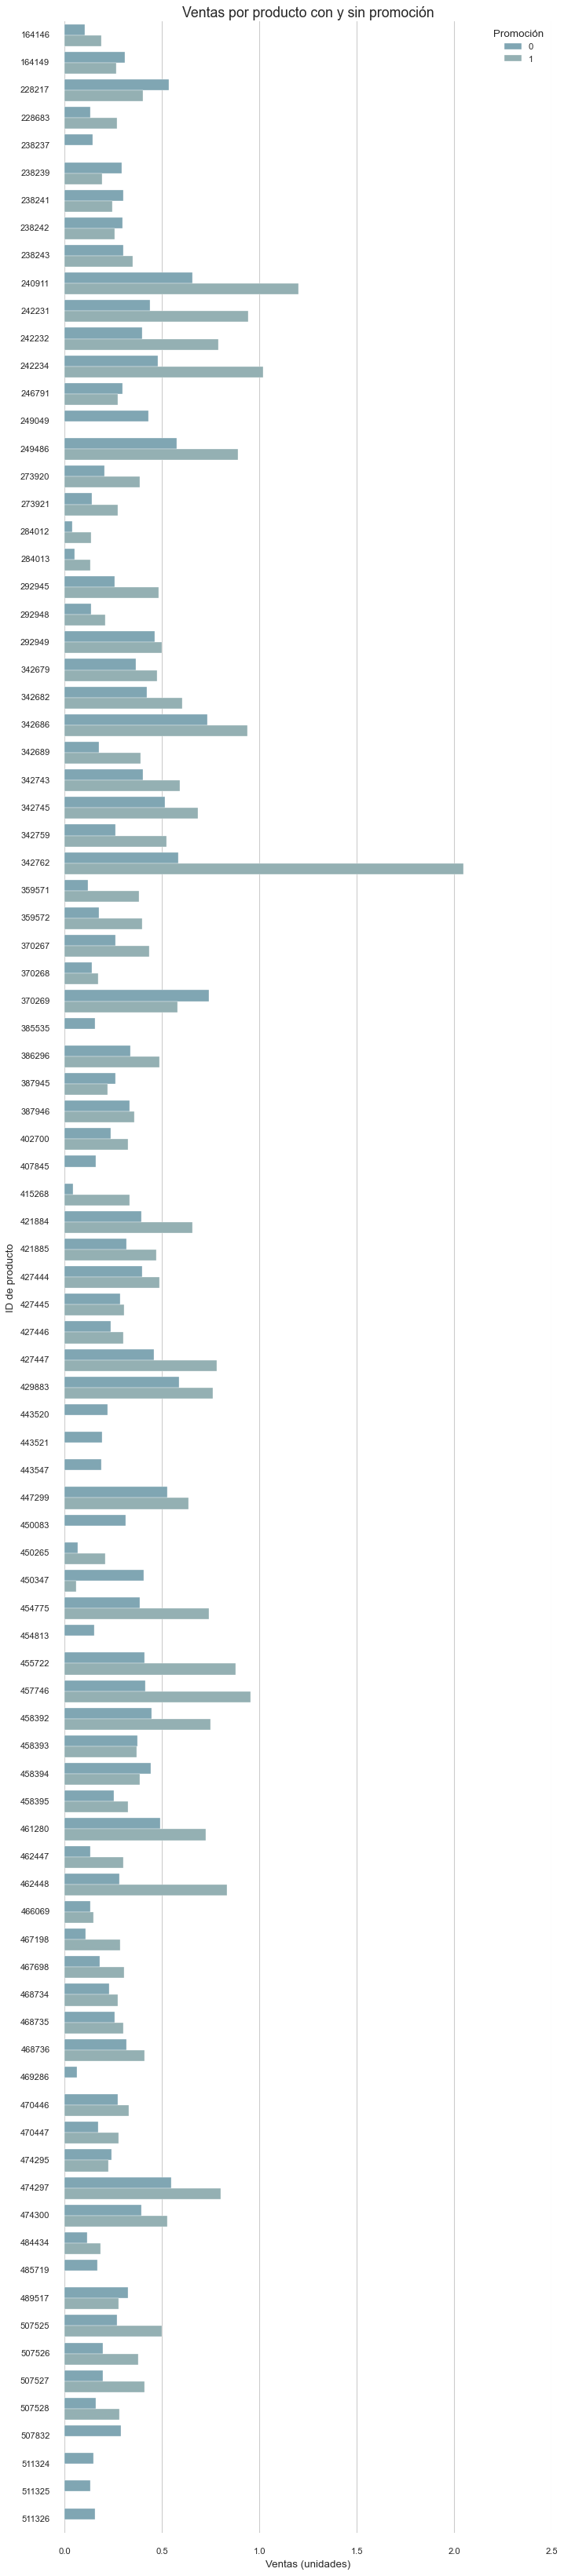

In [341]:
plt.figure(figsize=[10,50])
with sns.axes_style("whitegrid"):
    ax = sns.barplot(x='venta_unidades', y='id_producto', hue='tiene_promo', data=df_ventas, orient='h')
    sns.despine(offset=10, trim=True)
    color = "blend:#7AB,#EDA"
    sns.set_palette(sns.color_palette(color))
    plt.title('Ventas por producto con y sin promoción', fontsize=16)
    plt.xlabel('Ventas (unidades)', fontsize=12)
    plt.ylabel('ID de producto', fontsize=12)
    #bars = ax.containers
    #bar1 = bars[0]
    #bar2 = bars[1]
    #bar1.patches[0].set_label('Sin promoción')
    #bar2.patches[1].set_label('Con promoción')
    plt.legend(title='Promoción')
    #plt.legend(title='Promoción', labels=['Con promoción', 'Sin promoción'])
    plt.savefig(f'images/Ventas por producto con y sin promoción', dpi=300, bbox_inches='tight')
plt.show()

#### Análisis realizado para aquellos productos que se venden con y sin promoción 

In [12]:
df_ventas_promo = df.groupby(['id_producto', 'tiene_promo']).mean()['venta_unidades'].reset_index()

# Obtener los id_producto que tienen ventas con promoción y sin promoción
id_producto_con_promo = set(df_ventas_promo.loc[df_ventas_promo['tiene_promo'] == 1, 'id_producto'].unique())
id_producto_sin_promo = set(df_ventas_promo.loc[df_ventas_promo['tiene_promo'] == 0, 'id_producto'].unique())

# Obtener la intersección de ambos conjuntos
id_producto_en_ambos = id_producto_con_promo.intersection(id_producto_sin_promo)

# Filtrar el DataFrame original por los id_producto en ambos conjuntos
df_ventas_en_ambos = df.loc[df['id_producto'].isin(id_producto_en_ambos)]

# Obtener las ventas cuando tiene promoción y cuando no tiene promoción
ventas_promo = df_ventas_en_ambos.loc[df['tiene_promo'] == 1]
ventas_sin_promo = df_ventas_en_ambos.loc[df['tiene_promo'] == 0]

# Calcular la cantidad total de ventas para cada caso
total_ventas_promo = ventas_promo.venta_unidades.mean()
total_ventas_sin_promo = ventas_sin_promo.venta_unidades.mean()

# Imprimir los resultados
print(f"La cantidad total de ventas con promoción es {total_ventas_promo}")
print(f"La cantidad total de ventas sin promoción es {total_ventas_sin_promo}")
if total_ventas_promo > total_ventas_sin_promo:
    print("Se venden más productos con promoción.")
elif total_ventas_promo < total_ventas_sin_promo:
    print("Se venden más productos sin promoción.")
else:
    print("Las ventas con promoción y sin promoción son iguales.")

C:\Users\ro424\AppData\Local\Temp\ipykernel_9484\3379938715.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_ventas_promo = df.groupby(['id_producto', 'tiene_promo']).mean()['venta_unidades'].reset_index()


La cantidad total de ventas con promoción es 0.5431202759228003
La cantidad total de ventas sin promoción es 0.3315695025932878
Se venden más productos con promoción.


#### 18. Qué productos no se venden así tengan una promoción?
Terminar este punto

In [251]:

id_producto_sin_ventas = set(df.loc[(df['tiene_promo'] == 1) & (df['venta_unidades'] == 0), 'id_producto'])


#### 19. Cantidad de inventario de productos que más se venden?

In [252]:

# Obtener la cantidad total de unidades vendidas por producto
total_unidades_vendidas = df.groupby('id_producto')['venta_unidades'].sum()

# Ordenar los resultados por cantidad de unidades vendidas
total_unidades_vendidas = total_unidades_vendidas.sort_values(ascending=False)

# Obtener la cantidad total de inventario por producto
total_inventario = df.groupby('id_producto')['stock_unidades'].sum()

# Fusionar los resultados anteriores en un nuevo DataFrame
df_resumen = pd.concat([total_unidades_vendidas, total_inventario], axis=1, join='inner')

# Ordenar el resultado por la cantidad total de unidades vendidas
df_resumen = df_resumen.sort_values(by='venta_unidades', ascending=False)

# Mostrar los primeros 10 productos con mayor cantidad de unidades vendidas y su inventario correspondiente
print(df_resumen.head(10))

             venta_unidades  stock_unidades
id_producto                                
342686               109539         7488685
240911               100884         5495519
429883                89352         3737688
249486                86759         3344194
342745                72912         5034730
228217                68818         3331347
242234                68093         4255363
447299                66328         2861082
292949                64383         3394604
242231                62059         4176553


#### 20. Cantidad de inventario del producto que menos se vende?

In [253]:
menos_vendido = df[df['venta_unidades'] == df['venta_unidades'].min()]
menos_vendido

,idb,id_producto,fecha_trans,stock_unidades,venta_unidades,precio_unitario,sigue_prod_en_rol,cd_abast,mov_month,mov_year,...,local,punto_dist,desc_producto,razon_social,id_region,dia_semana,is_weekend,tiene_promo,estacion,zona
0,5205,273921,2019-07-14,7,0,157.03,1,9217,7,2019,...,1,0,freshmatic airwick lavanda repuesto 250.00 mlt,reckitt benckiser argentina s.a.,1,Sunday,1,0,verano,4
1,9026,273920,2019-07-14,18,0,157.03,1,9217,7,2019,...,1,0,refill citrico oil escence air wick citricos t...,reckitt benckiser argentina s.a.,1,Sunday,1,0,verano,4
2,5263,468735,2019-07-14,11,0,145.10,1,9217,7,2019,...,1,0,glade automatico 3 en 1 aromatizante de ambien...,s. c. johnson y son de arg. s.a.,1,Sunday,1,0,verano,4
3,9030,461280,2019-07-14,10,0,145.10,1,9217,7,2019,...,1,0,glade automatico desodorante de ambientes vain...,s. c. johnson y son de arg. s.a.,1,Sunday,1,0,verano,4
4,9159,470446,2019-07-14,2,0,145.10,1,9217,7,2019,...,1,0,glade automatico ref ed ltda 1 175gx6 pop frut...,s. c. johnson y son de arg. s.a.,1,Sunday,1,0,verano,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8272123,9030,273920,2018-01-10,12,0,81.91,1,9217,1,2018,...,1,0,refill citrico oil escence air wick citricos t...,reckitt benckiser argentina s.a.,1,Wednesday,0,0,invierno,4
8272124,9240,238237,2018-01-10,12,0,28.42,1,9217,1,2018,...,1,0,poett lavanda full ab nuevo 0.040 kg,clorox argentina s.a.,1,Wednesday,0,0,invierno,4
8272125,9942,385535,2018-01-10,0,0,28.42,1,9217,1,2018,...,1,0,poett primavera full ab nuevo 0.040 kg,clorox argentina s.a.,1,Wednesday,0,0,invierno,3
8272126,9155,238237,2018-01-10,6,0,28.42,1,9217,1,2018,...,1,0,poett lavanda full ab nuevo 0.040 kg,clorox argentina s.a.,1,Wednesday,0,0,invierno,4


In [254]:
inventario_menos_vendido = menos_vendido['stock_unidades'].iloc[0]
inventario_menos_vendido

7

#### 21. Cantidad de inventario de los productos que menos se venden?

In [255]:
# Agrupar por id_producto y sumar las unidades vendidas
df_unidades_vendidas = df.groupby('id_producto')['venta_unidades'].sum()

# Ordenar el DataFrame de manera ascendente según las unidades vendidas
df_unidades_vendidas = df_unidades_vendidas.sort_values()

# Seleccionar los últimos productos (los que menos se venden)
df_menos_vendidos = df_unidades_vendidas.head().reset_index()
df_menos_vendidos

,id_producto,venta_unidades
0,511325,1983
1,284013,2564
2,466069,2816
3,511324,2927
4,511326,3063


In [256]:
# Obtener la cantidad de inventario de los productos seleccionados
df_cantidad_inventario = df.loc[df['id_producto'].isin(df_menos_vendidos.index), 'stock_unidades']
df_cantidad_inventario

Series([], Name: stock_unidades, dtype: int64)

#### Comparativa de ventas de productos por meses de acuerdo al año

In [13]:
df_ventas_mes_prod= df.groupby(['id_producto', 'mov_month', 'mov_year'])['venta_unidades'].sum().reset_index()
df_ventas_mes_prod

,id_producto,mov_month,mov_year,venta_unidades
0,164146,1,2017,106
1,164146,1,2018,114
2,164146,1,2019,236
3,164146,2,2017,120
4,164146,2,2018,104
...,...,...,...,...
3099,511326,5,2019,514
3100,511326,6,2019,583
3101,511326,7,2019,214
3102,511326,11,2018,69


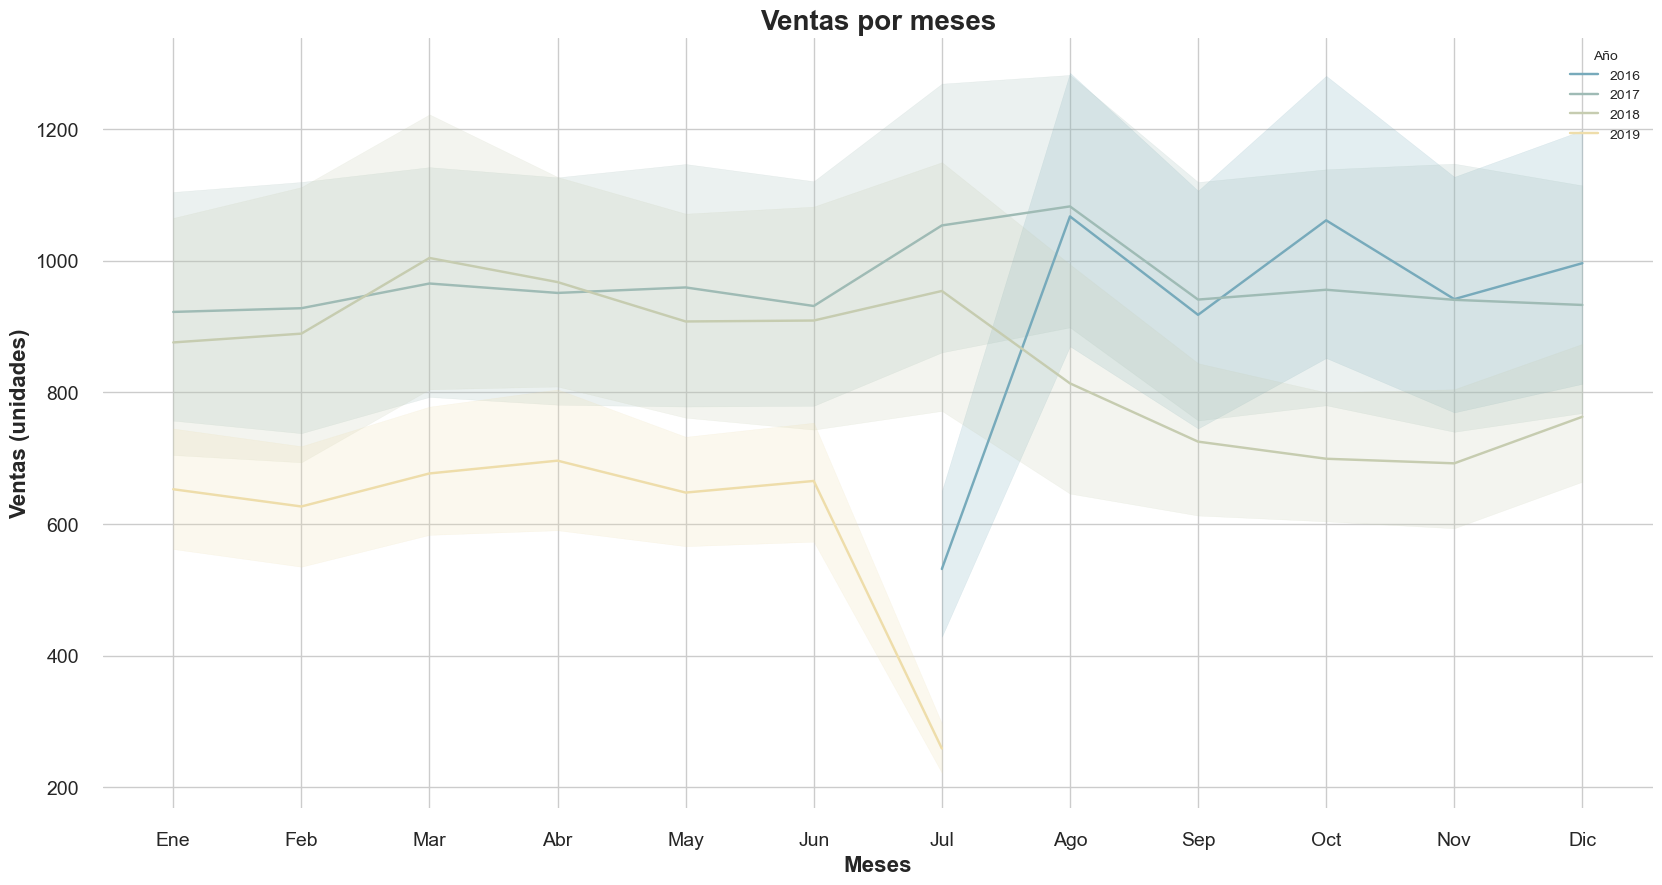

In [14]:
plt.figure(figsize=[20,10])
with sns.axes_style('whitegrid'):
    sns.lineplot(x='mov_month', y='venta_unidades', data=df_ventas_mes_prod, hue='mov_year', palette='blend:#7AB,#EDA')
    sns.despine(offset=10, trim=True)
    plt.xticks(range(1,13), ['Ene','Feb','Mar','Abr','May','Jun','Jul','Ago','Sep','Oct','Nov','Dic'])
    plt.title('Ventas por meses', fontsize=20, fontweight='bold')
    plt.xlabel('Meses', fontsize=16, fontweight='bold')
    plt.ylabel('Ventas (unidades)', fontsize=16, fontweight='bold')
    plt.legend(title='Año')
    plt.xticks(fontsize=14)
    plt.yticks(fontsize=14)
    plt.savefig(f'images/Ventas_por_meses', dpi=300, bbox_inches='tight')


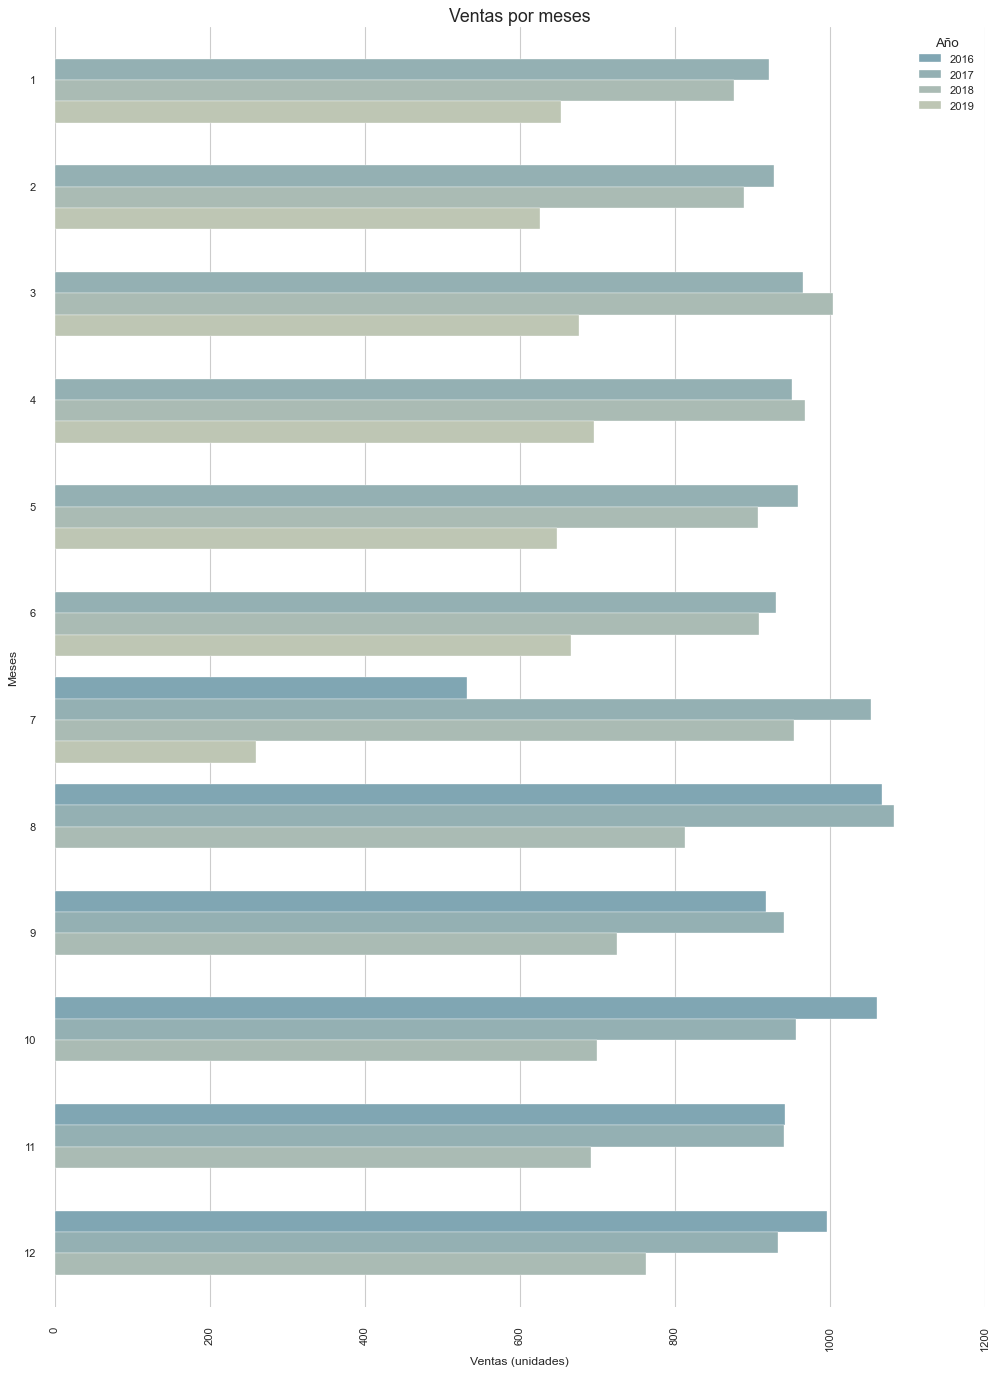

In [259]:
plt.figure(figsize=[15,20])
with sns.axes_style('whitegrid'):
    sns.barplot(x='venta_unidades', y='mov_month', data= df_ventas_mes_prod, hue= 'mov_year', orient= 'h', errorbar=None)
    sns.despine(offset=10, trim=True)
    color = "blend:#7AB,#EDA"
    sns.set_palette(sns.color_palette(color))
    plt.xticks(rotation=90)
    plt.title('Ventas por meses', fontsize=16)
    plt.xlabel('Ventas (unidades)')
    plt.ylabel('Meses')
    plt.legend(title='Año')
    plt.savefig(f'images/Ventas_por_meses', dpi=300, bbox_inches='tight')

División por zonas, Ventas por zonas

In [260]:
df_ventas_zona= df.groupby(['id_producto', 'mov_month', 'mov_year'])['venta_unidades'].sum().reset_index()
df_ventas_zona

,id_producto,mov_month,mov_year,venta_unidades
0,164146,1,2017,106
1,164146,1,2018,114
2,164146,1,2019,236
3,164146,2,2017,120
4,164146,2,2018,104
...,...,...,...,...
3099,511326,5,2019,514
3100,511326,6,2019,583
3101,511326,7,2019,214
3102,511326,11,2018,69


In [ ]:
#### Ventas de producto con y sin promoción por día de semana

In [15]:
df_día_semana_mas_venta = df.groupby(['dia_semana', 'tiene_promo'])['venta_unidades'].mean().reset_index()

# Definir el orden de las categorías de día de la semana
order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

# Conviertir la columna 'dia_semana' en una categoría ordenada
df_día_semana_mas_venta['dia_semana'] = pd.Categorical(df_día_semana_mas_venta['dia_semana'], categories=order, ordered=True)

# Ordenar el DataFrame por la columna 'dia_semana'
df_día_semana_mas_venta = df_día_semana_mas_venta.sort_values('dia_semana')

df_día_semana_mas_venta



,dia_semana,tiene_promo,venta_unidades
2,Monday,0,0.322650
3,Monday,1,0.509960
10,Tuesday,0,0.219664
11,Tuesday,1,0.358810
12,Wednesday,0,0.292941
13,Wednesday,1,0.540930
8,Thursday,0,0.379695
9,Thursday,1,0.715025
0,Friday,0,0.254133
1,Friday,1,0.477904


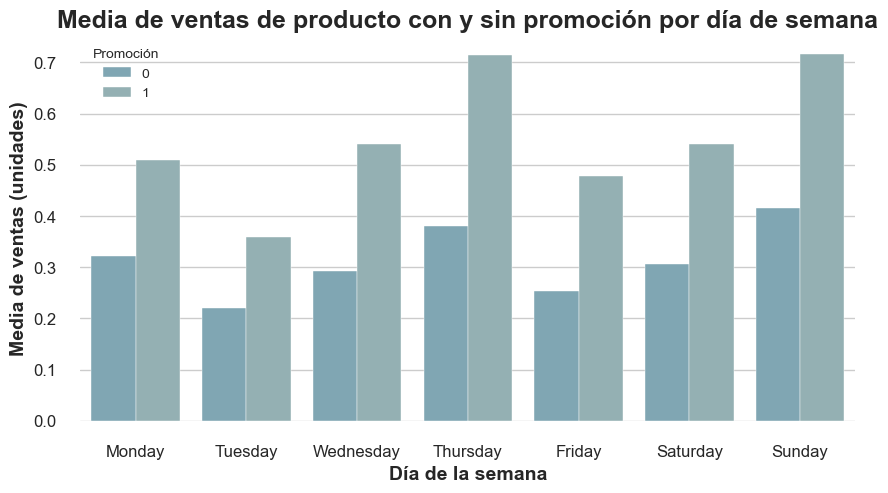

In [52]:
plt.figure(figsize=[10,5])
with sns.axes_style("whitegrid"):
    ax = sns.barplot(x='dia_semana', y='venta_unidades', hue='tiene_promo', data=df_día_semana_mas_venta)
    sns.despine(offset=10, trim=True)
    color = "blend:#7AB,#EDA"
    sns.set_palette(sns.color_palette(color))
    plt.title('Media de ventas de producto con y sin promoción por día de semana', fontsize=18, fontweight='bold')
    plt.xlabel('Día de la semana', fontsize=14, fontweight='bold')
    plt.ylabel('Media de ventas (unidades)', fontsize=14, fontweight='bold')
    plt.legend(title='Promoción')
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    plt.savefig(f'images/Media_ventas_por_dia_de_semana_con_y_sin_promoción', dpi=300, bbox_inches='tight')
plt.show()

Al analizar los datos, se puede concluir que los días de mayor venta son los domingos y jueves, tanto para las promociones como para las ventas regulares.

### Ratio de ventas con promo y sin promo por productos

In [17]:

# agrupar por id_producto y tiene_promo y obtener la media de ventas
df_grouped = df.groupby(['id_producto', 'tiene_promo'])['venta_unidades'].mean().reset_index()

# pivotear el dataframe para tener las medias de ventas con y sin promoción en columnas separadas
df_pivoted = df_grouped.pivot(index='id_producto', columns='tiene_promo', values='venta_unidades').reset_index()

# calcular el ratio de ventas
df_pivoted['ratio_ventas'] = df_pivoted[1] / df_pivoted[0]

# renombrar columnas
df_pivoted.columns = ['id_producto', 'media_ventas_sin_promo', 'media_ventas_con_promo', 'ratio_ventas']

# mostrar el dataframe resultante
df_pivoted.head(10)


,id_producto,media_ventas_sin_promo,media_ventas_con_promo,ratio_ventas
0,164146,0.105091,0.186275,1.772504
1,164149,0.310996,0.265641,0.854161
2,228217,0.533954,0.401777,0.752457
3,228683,0.130980,0.268493,2.049875
4,238237,0.145271,NaN,NaN
5,238239,0.293554,0.191304,0.651684
6,238241,0.302578,0.243478,0.804678
7,238242,0.295574,0.255556,0.864609
8,238243,0.301455,0.349057,1.157905
9,240911,0.655687,1.202013,1.833212


In [18]:
df_pivoted.dropna(inplace=True)
df_pivoted.head(10)

,id_producto,media_ventas_sin_promo,media_ventas_con_promo,ratio_ventas
0,164146,0.105091,0.186275,1.772504
1,164149,0.310996,0.265641,0.854161
2,228217,0.533954,0.401777,0.752457
3,228683,0.130980,0.268493,2.049875
5,238239,0.293554,0.191304,0.651684
6,238241,0.302578,0.243478,0.804678
7,238242,0.295574,0.255556,0.864609
8,238243,0.301455,0.349057,1.157905
9,240911,0.655687,1.202013,1.833212
10,242231,0.437181,0.940604,2.151519


In [19]:
df_sorted = df_pivoted.sort_values(by='ratio_ventas', ascending=False)
df_sorted.head(10)

,id_producto,media_ventas_sin_promo,media_ventas_con_promo,ratio_ventas
42,415268,0.042489,0.331683,7.806380
30,342762,0.583609,2.048077,3.509332
18,284012,0.039914,0.137540,3.445898
31,359571,0.121198,0.383051,3.160530
55,450265,0.068524,0.207469,3.027695
67,462448,0.282212,0.831683,2.947015
69,467198,0.105601,0.284360,2.692791
19,284013,0.052222,0.131980,2.527304
60,457746,0.413291,0.955670,2.312344
66,462447,0.130253,0.300000,2.303213


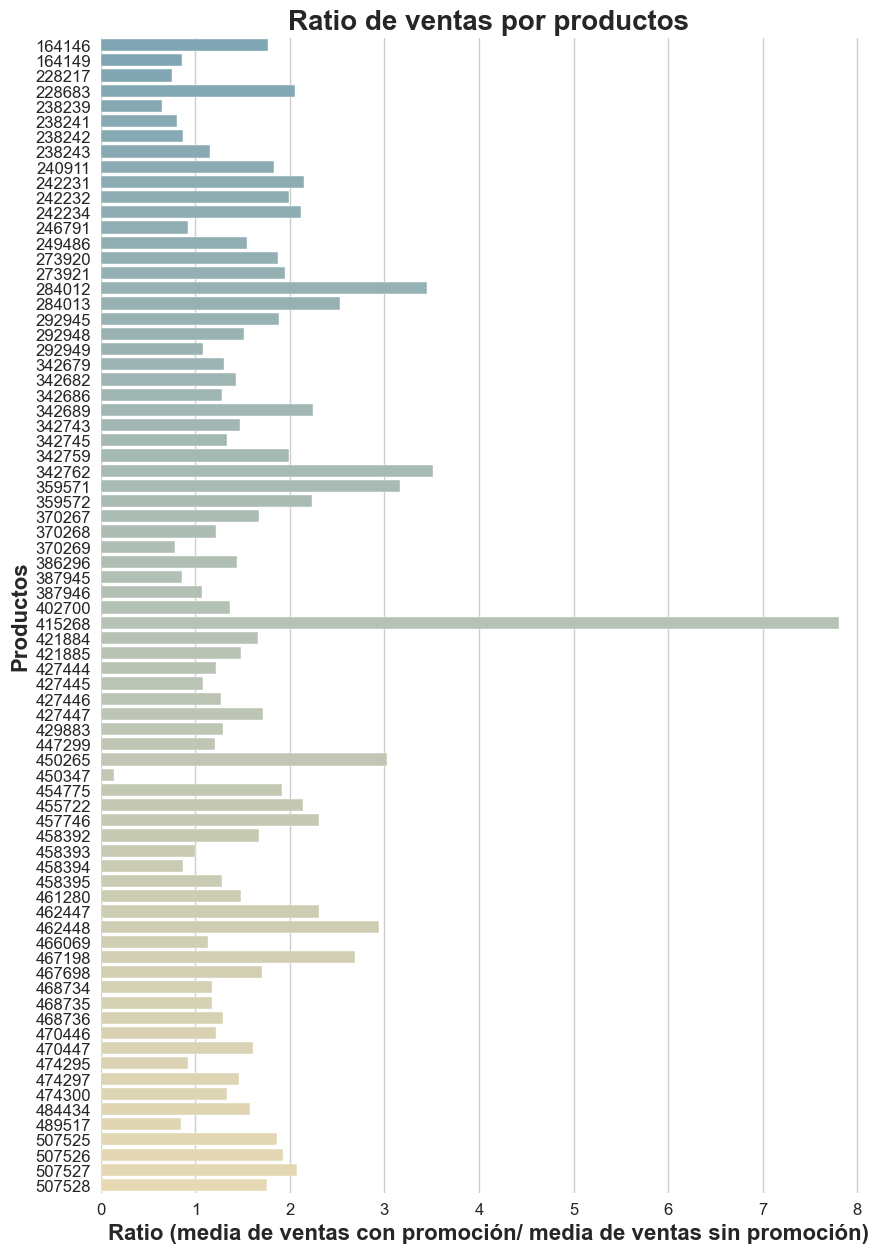

In [29]:
plt.figure(figsize=[10,15])
with sns.axes_style('whitegrid'):
    sns.barplot(x='ratio_ventas', y='id_producto', data=df_sorted, errorbar=None, palette=color, orient= 'h')
    plt.title("Ratio de ventas por productos", fontweight='bold', fontsize=20)
    plt.xlabel('Ratio (media de ventas con promoción/ media de ventas sin promoción)', fontweight='bold', fontsize=16)
    #plt.xticks(rotation=90)
    plt.ylabel('Productos', fontweight='bold', fontsize=16)
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    plt.savefig(f'images/Ratio_de_ventas_por_productos', dpi=300, bbox_inches='tight')

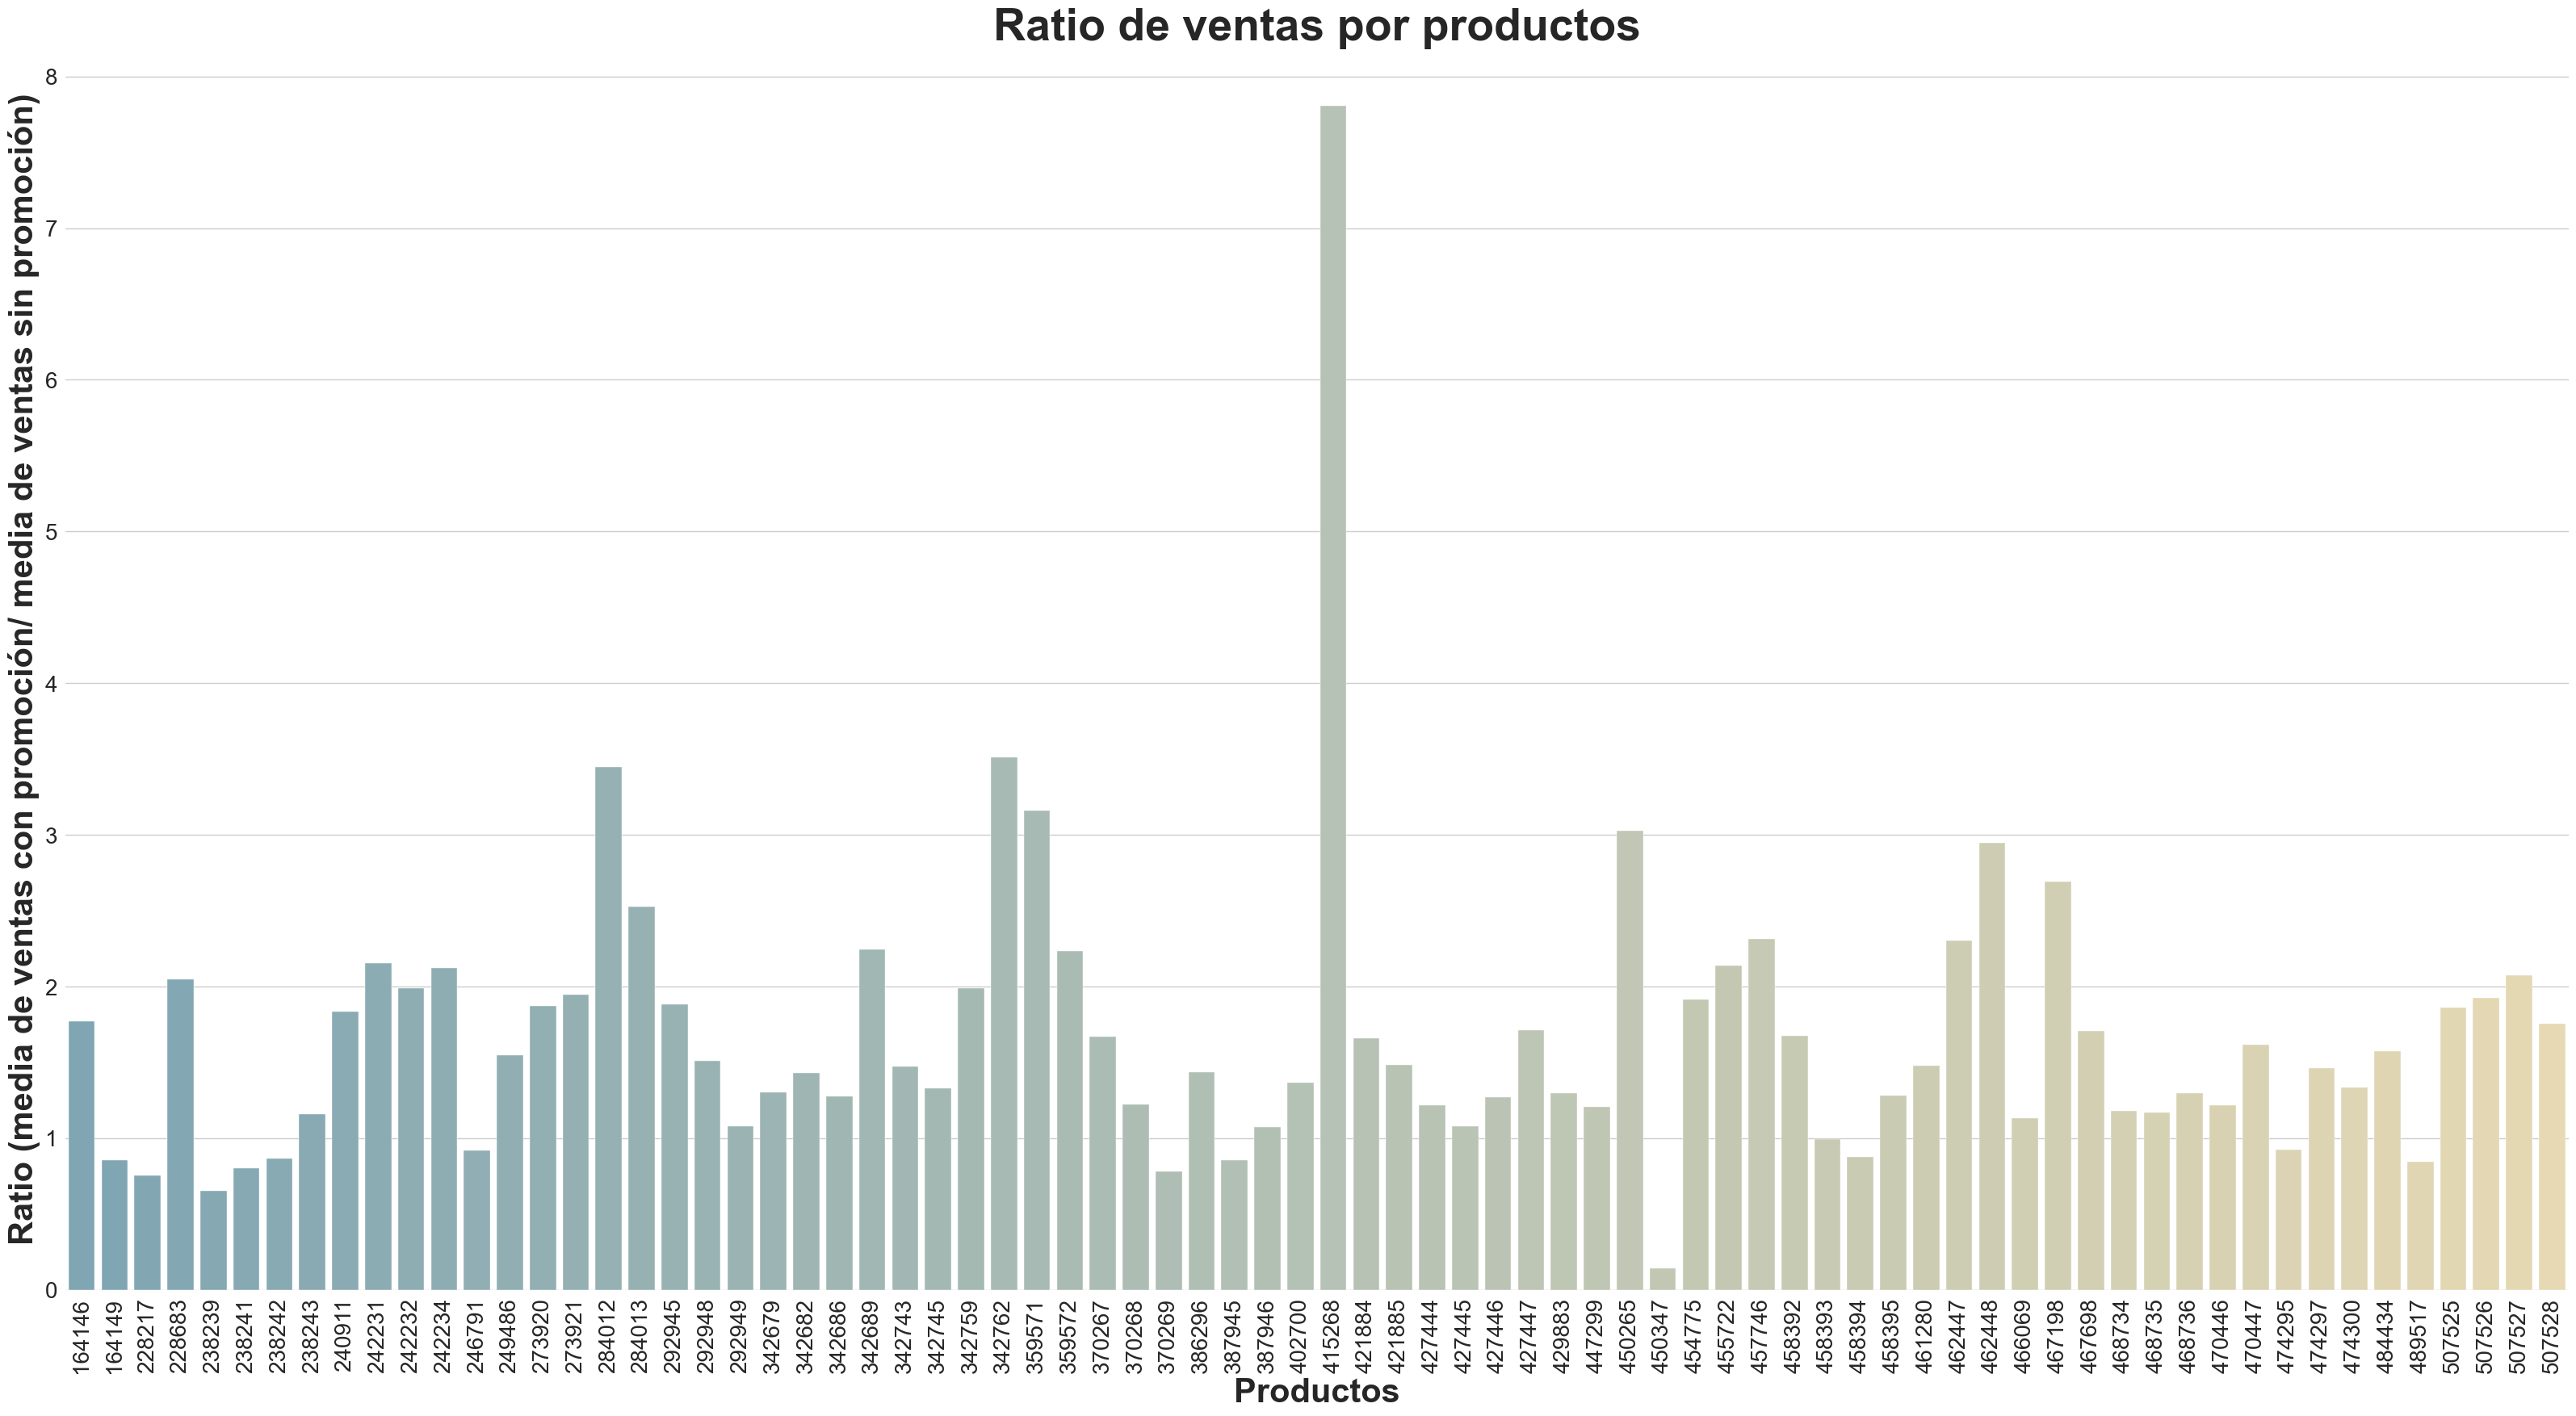

In [30]:
plt.figure(figsize=[40,20])
with sns.axes_style('whitegrid'):
    sns.barplot(x='id_producto', y='ratio_ventas', data=df_sorted, errorbar=None, palette=color)

        # set the color palette
   # color = "blend:#7AB,#EDA"
    #sns.set_palette(sns.color_palette(color))
    plt.title("Ratio de ventas por productos", fontweight='bold', fontsize=40)
    plt.xlabel('Productos', fontweight='bold', fontsize=30)
    plt.xticks(rotation=90)
    plt.ylabel('Ratio (media de ventas con promoción/ media de ventas sin promoción)', fontweight='bold', fontsize=30)
    plt.xticks(fontsize=20)
    plt.yticks(fontsize=20)
    plt.savefig(f'images/Ratio_de_ventas_por_productos', dpi=300, bbox_inches='tight')

In [493]:
producto_seleccionado = df.loc[df['id_producto'] == 450347, 'desc_producto']
producto_seleccionado

718        missing
1194       missing
1904       missing
2016       missing
2498       missing
            ...   
8169777    missing
8170620    missing
8171952    missing
8172090    missing
8175524    missing
Name: desc_producto, Length: 60721, dtype: object

In [389]:
# agrupar por id_producto, mov_year y tiene_promo y calcular la media de venta_unidades
df_grouped = df.groupby(['id_producto', 'mov_year', 'tiene_promo'], as_index=False)['venta_unidades'].mean()

# crear una nueva columna con la media de ventas con promoción
df_promo = df_grouped[df_grouped['tiene_promo'] == 1].rename(columns={'venta_unidades': 'media_ventas_promo'})[['id_producto', 'mov_year', 'media_ventas_promo']]

# crear una nueva columna con la media de ventas sin promoción
df_no_promo = df_grouped[df_grouped['tiene_promo'] == 0].rename(columns={'venta_unidades': 'media_ventas_no_promo'})[['id_producto', 'mov_year', 'media_ventas_no_promo']]

# unir los dataframes anteriores
df_merge = pd.merge(df_promo, df_no_promo, on=['id_producto', 'mov_year'])

# calcular el ratio de ventas
df_merge['ratio_ventas'] = df_merge['media_ventas_promo'] / df_merge['media_ventas_no_promo']

# seleccionar las columnas deseadas
df_final = df_merge[['id_producto', 'mov_year', 'media_ventas_promo', 'media_ventas_no_promo', 'ratio_ventas']]

df_final

,id_producto,mov_year,media_ventas_promo,media_ventas_no_promo,ratio_ventas
0,164146,2016,0.284722,0.232527,1.224468
1,164146,2017,0.269231,0.228650,1.177481
2,164146,2019,0.071429,0.062547,1.141996
3,164149,2018,1.041667,0.245311,4.246307
4,164149,2019,0.246057,0.191124,1.287417
...,...,...,...,...,...
197,507526,2018,1.375000,0.177856,7.730952
198,507526,2019,0.335097,0.208843,1.604541
199,507527,2018,0.125000,0.191363,0.653208
200,507527,2019,0.412201,0.202961,2.030942


In [391]:
df_final.dropna(inplace=True)

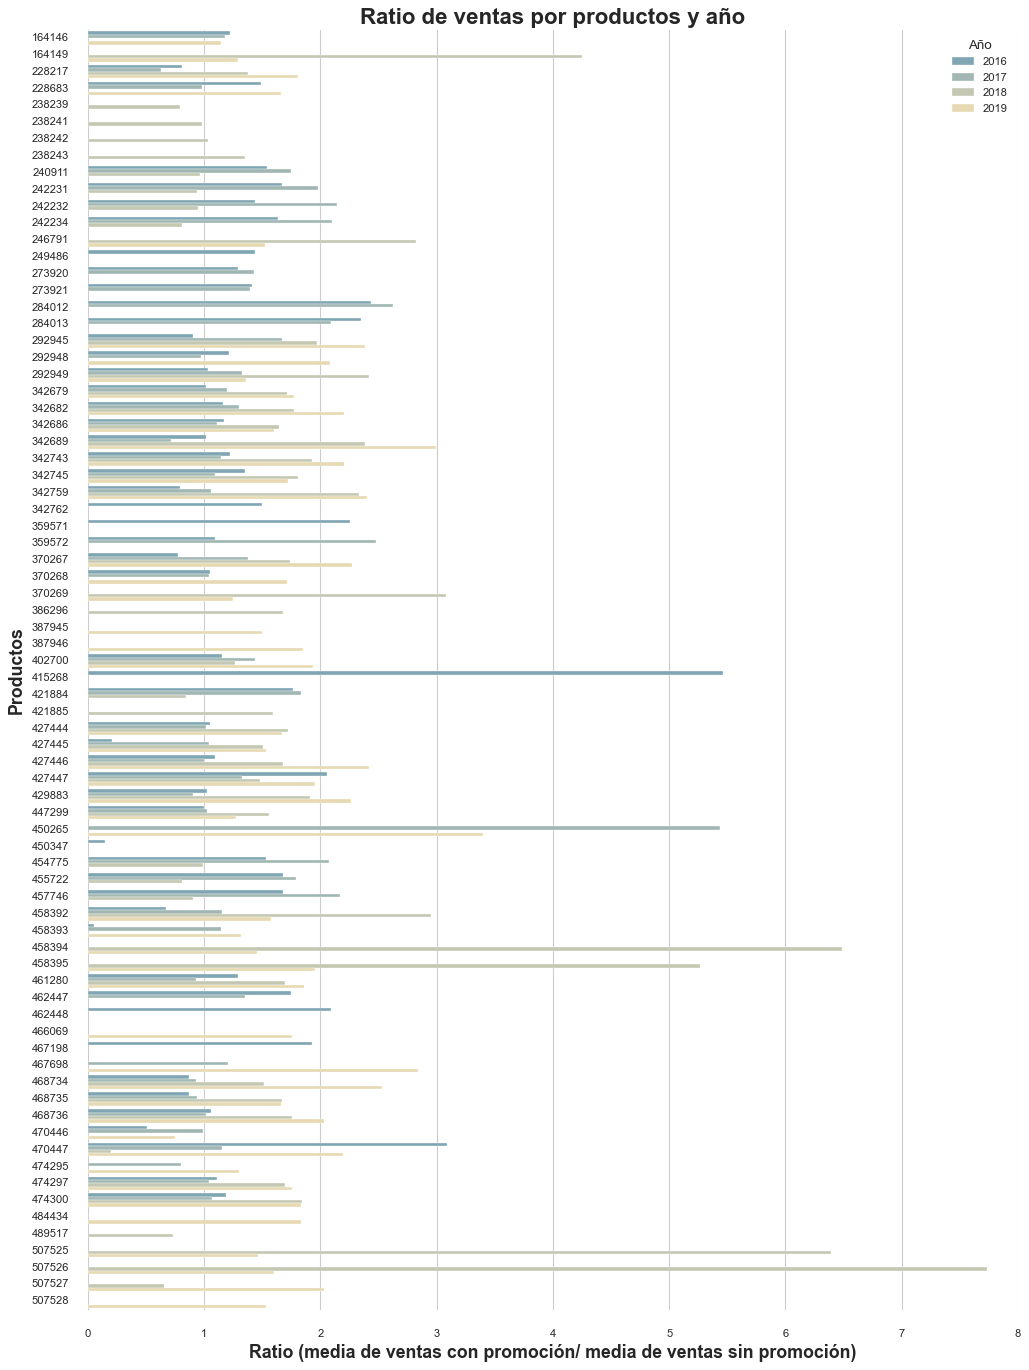

In [393]:
plt.figure(figsize=[15,20])
with sns.axes_style("whitegrid"):
    ax = sns.barplot(x='ratio_ventas', y='id_producto', hue='mov_year', data=df_final, orient='h', palette=color)
    sns.despine(offset=10, trim=True)
    plt.title("Ratio de ventas por productos y año", fontweight='bold', fontsize=20)
    plt.xlabel('Ratio (media de ventas con promoción/ media de ventas sin promoción)', fontweight='bold', fontsize=16)
    plt.ylabel('Productos', fontweight='bold', fontsize=16)
    plt.legend(title='Año')
    #plt.savefig(f'images/Ratio_de_ventas_por_productos_por_año', dpi=300, bbox_inches='tight')
plt.show()

In [478]:
# contar el número de filas en las que ratio_ventas es mayor que 1
num_filas_ratio_mayor_1 = len(df_pivoted[df_pivoted['ratio_ventas'] > 1])

# calcular el porcentaje de filas en las que ratio_ventas es mayor que 1
porcentaje_ratio_mayor_1 = num_filas_ratio_mayor_1 / len(df_pivoted) * 100

print(f"El {porcentaje_ratio_mayor_1:.2f}% de los productos tienen un ratio de ventas mayor que 1.")


El 82.89% de los productos tienen un ratio de ventas mayor que 1.


### ¿Cuáles son las promociones más efectivas para aumentar las ventas de desodorantes?

#### Mejor pormoción a nivel general (sumatoria de ventas en general)

In [31]:
df_mejor_promo = df.groupby('nro_prom')['venta_unidades'].mean().reset_index()
df_mejor_promo = df_mejor_promo.sort_values(by='venta_unidades', ascending=False)

df_mejor_promo=df_mejor_promo[(df_mejor_promo['nro_prom']>0)]

df_mejor_promo_2=df_mejor_promo.head(10)

df_mejor_promo_2

,nro_prom,venta_unidades
68,488290,1.836601
97,521675,1.659664
36,452976,1.621429
35,452913,1.551948
73,491206,1.544192
95,517727,1.486111
66,484088,1.478261
53,470166,1.349282
65,484062,1.336756
46,459441,1.312500


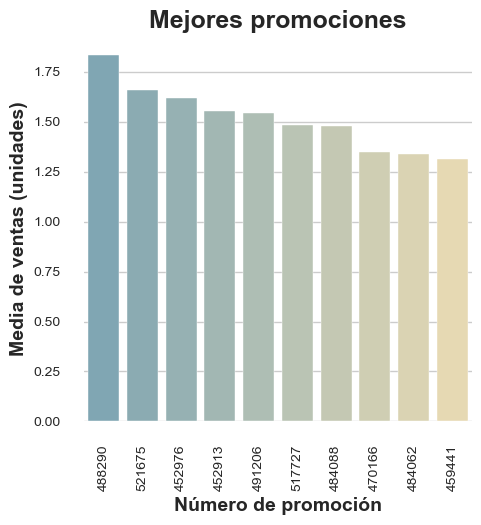

In [49]:
plt.figure(figsize=[5,5])
with sns.axes_style("whitegrid"):
            ax= sns.barplot(x='nro_prom', y='venta_unidades', data=df_mejor_promo, 
            order=df_mejor_promo_2.sort_values('venta_unidades', ascending=False)['nro_prom'], palette=color)
            sns.despine(offset=10, trim=True)
            plt.title('Mejores promociones', fontsize=18, fontweight='bold')
            plt.xlabel('Número de promoción', fontsize=14, fontweight='bold')
            plt.ylabel('Media de ventas (unidades)', fontsize=14, fontweight='bold')
            plt.xticks(rotation=90)
            plt.xticks(fontsize=10)
            plt.yticks(fontsize=10)
            plt.savefig(f'images/Mejores_promociones', dpi=300, bbox_inches='tight')
plt.show()

La promoción que ha tenido mayor media de ventas es la número 488290.

Características de las mejores cinco promociones:

| **Nº Promoción** | **Días de duración** | **Mes**   | **Año** | **Zona** |
|:----------------:|:--------------------:|:---------:|:-------:|:--------:|
| **488290**       | 16                   | Febrero   | 2018    | 3        |
| **521675**       | 16                   | Diciembre | 2018    | 4        |
| **452976**       | 9                    | Febrero   | 2017    | 4        |
| **452913**       | 10                   | Febrero   | 2017    | 4        |
| **491206**       | 7                    | Marzo     | 2018    | 4        |

In [ ]:
mov_year', 'mov_month', 'zona',

In [499]:
producto_filtrado_1 = df.loc[df['nro_prom'] == 488290, ['duracion_promo', 'mov_year', 'mov_month', 'zona']]
producto_filtrado_1

,duracion_promo,mov_year,mov_month,zona
8030849,16,2018,2,3
8030905,16,2018,2,3
8031099,16,2018,2,3
8031403,16,2018,2,3
8031796,16,2018,2,3
...,...,...,...,...
8128501,16,2018,2,3
8129284,16,2018,2,3
8130088,16,2018,2,3
8130465,16,2018,2,3


In [500]:
producto_filtrado_2 = df.loc[df['nro_prom'] == 521675, ['duracion_promo', 'mov_year', 'mov_month', 'zona']]
producto_filtrado_2

,duracion_promo,mov_year,mov_month,zona
1909901,16,2018,12,4
1910781,16,2018,12,4
1911112,16,2018,12,4
1911255,16,2018,12,4
1912888,16,2018,12,4
...,...,...,...,...
2073278,16,2018,12,4
2073955,16,2018,12,4
2075420,16,2018,12,4
2076073,16,2018,12,4


In [501]:
producto_filtrado_3 = df.loc[df['nro_prom'] == 452976, ['duracion_promo', 'mov_year', 'mov_month', 'zona']]
producto_filtrado_3

,duracion_promo,mov_year,mov_month,zona
5372903,9,2017,2,4
5373042,9,2017,2,4
5375844,9,2017,2,4
5376420,9,2017,2,4
5376588,9,2017,2,4
...,...,...,...,...
5437876,9,2017,2,4
5438241,9,2017,2,4
5438820,9,2017,2,4
5438899,9,2017,2,4


In [502]:
producto_filtrado_4 = df.loc[df['nro_prom'] == 452913, ['duracion_promo', 'mov_year', 'mov_month', 'zona']]
producto_filtrado_4

,duracion_promo,mov_year,mov_month,zona
5373390,10,2017,2,4
5373590,10,2017,2,4
5374834,10,2017,2,4
5375077,10,2017,2,4
5375342,10,2017,2,4
...,...,...,...,...
5446722,10,2017,2,4
5447578,10,2017,2,4
5447704,10,2017,2,4
5447766,10,2017,2,4


In [504]:
producto_filtrado_5 = df.loc[df['nro_prom'] == 491206, ['duracion_promo', 'mov_year', 'mov_month', 'zona']]
producto_filtrado_5

,duracion_promo,mov_year,mov_month,zona
7801325,7,2018,3,4
7801326,7,2018,3,4
7801446,7,2018,3,4
7801447,7,2018,3,4
7801516,7,2018,3,4
...,...,...,...,...
7859468,7,2018,3,4
7859472,7,2018,3,4
7859522,7,2018,3,4
7859591,7,2018,3,4


#### Promociones por año

Año 2016

In [134]:
df_2016 = df[(df['mov_year'] == 2016)]


In [422]:
ventas_promo_2016 = df_2016.loc[df['tiene_promo']==1, 'venta_unidades'].mean()

print("La media de ventas de productos con promoción en el año 2016 es:", ventas_promo_2016)

La media de ventas de productos con promoción en el año 2016 es: 0.5876546295139323


In [423]:
ventas_sin_promo_2016 = df_2016.loc[df['tiene_promo']==0, 'venta_unidades'].mean()

print("La media de ventas de productos sin promoción en el año 2016 es:", ventas_sin_promo_2016)

La media de ventas de productos sin promoción en el año 2016 es: 0.3749595907222985


In [424]:
df_mejor_promo_2016 = df_2016.groupby('nro_prom')['venta_unidades'].mean().reset_index()
df_mejor_promo_2016 = df_mejor_promo_2016.sort_values(by='venta_unidades', ascending=False)

df_mejor_promo_2016=df_mejor_promo_2016[(df_mejor_promo_2016['nro_prom']>0)]

df_mejor_promo_2016_2=df_mejor_promo_2016.head(5)

df_mejor_promo_2016_2

,nro_prom,venta_unidades
27,443296,1.162500
17,435968,1.158730
19,436830,1.045952
16,432776,0.929642
18,436828,0.856621


Año 2017

In [148]:
df_2017 = df[(df['mov_year'] == 2017)]

In [425]:
ventas_promo_2017 = df_2017.loc[df['tiene_promo']==1, 'venta_unidades'].mean()

print("La media de ventas de productos con promoción en el año 2017 es:", ventas_promo_2017)

La media de ventas de productos con promoción en el año 2017 es: 0.5322266681085758


In [426]:
ventas_sin_promo_2017 = df_2017.loc[df['tiene_promo']==0, 'venta_unidades'].mean()

print("La media de ventas de productos sin promoción en el año 2017 es:", ventas_sin_promo_2017)

La media de ventas de productos sin promoción en el año 2017 es: 0.40503376994957796


In [427]:
df_mejor_promo_2017 = df_2017.groupby('nro_prom')['venta_unidades'].mean().reset_index()
df_mejor_promo_2017 = df_mejor_promo_2017.sort_values(by='venta_unidades', ascending=False)

df_mejor_promo_2017=df_mejor_promo_2017[(df_mejor_promo_2017['nro_prom']>0)]

df_mejor_promo_2017_2=df_mejor_promo_2017.head(5)

df_mejor_promo_2017_2

,nro_prom,venta_unidades
8,452976,1.621429
7,452913,1.551948
25,470166,1.349282
18,459441,1.312500
17,459100,0.961538


Año 2018

In [429]:
df_2018 = df[(df['mov_year'] == 2018)]

In [431]:
ventas_promo_2018 = df_2018.loc[df['tiene_promo']==1, 'venta_unidades'].mean()

print("La media de ventas de productos con promoción en el año 2018 es:", ventas_promo_2018)

La media de ventas de productos con promoción en el año 2018 es: 0.6447172909986705


In [432]:
ventas_sin_promo_2018 = df_2018.loc[df['tiene_promo']==0, 'venta_unidades'].mean()

print("La media de ventas de productos sin promoción en el año 2018 es:", ventas_sin_promo_2018)

La media de ventas de productos sin promoción en el año 2018 es: 0.2919536117507041


In [433]:
df_mejor_promo_2018 = df_2018.groupby('nro_prom')['venta_unidades'].mean().reset_index()
df_mejor_promo_2018 = df_mejor_promo_2018.sort_values(by='venta_unidades', ascending=False)

df_mejor_promo_2018=df_mejor_promo_2018[(df_mejor_promo_2018['nro_prom']>0)]

df_mejor_promo_2018_2=df_mejor_promo_2018.head(5)

df_mejor_promo_2018_2

,nro_prom,venta_unidades
4,488290,1.836601
33,521675,1.659664
9,491206,1.544192
31,517727,1.486111
2,484088,1.478261


Año 2019

In [434]:
df_2019 = df[(df['mov_year'] == 2019)]

In [435]:
ventas_promo_2019 = df_2019.loc[df['tiene_promo']==1, 'venta_unidades'].mean()

print("La media de ventas de productos con promoción en el año 2019 es:", ventas_promo_2019)

La media de ventas de productos con promoción en el año 2019 es: 0.4250734573947111


In [436]:
ventas_sin_promo_2019 = df_2019.loc[df['tiene_promo']==0, 'venta_unidades'].mean()

print("La media de ventas de productos sin promoción en el año 2019 es:", ventas_sin_promo_2019)

La media de ventas de productos sin promoción en el año 2019 es: 0.1972164725278358


In [437]:
df_mejor_promo_2019 = df_2019.groupby('nro_prom')['venta_unidades'].mean().reset_index()
df_mejor_promo_2019 = df_mejor_promo_2019.sort_values(by='venta_unidades', ascending=False)

df_mejor_promo_2019=df_mejor_promo_2019[(df_mejor_promo_2019['nro_prom']>0)]

df_mejor_promo_2019_2=df_mejor_promo_2019.head(5)

df_mejor_promo_2019_2

,nro_prom,venta_unidades
4,527744,0.588710
6,528346,0.562068
10,533035,0.504143
14,537641,0.435073
1,523199,0.421608


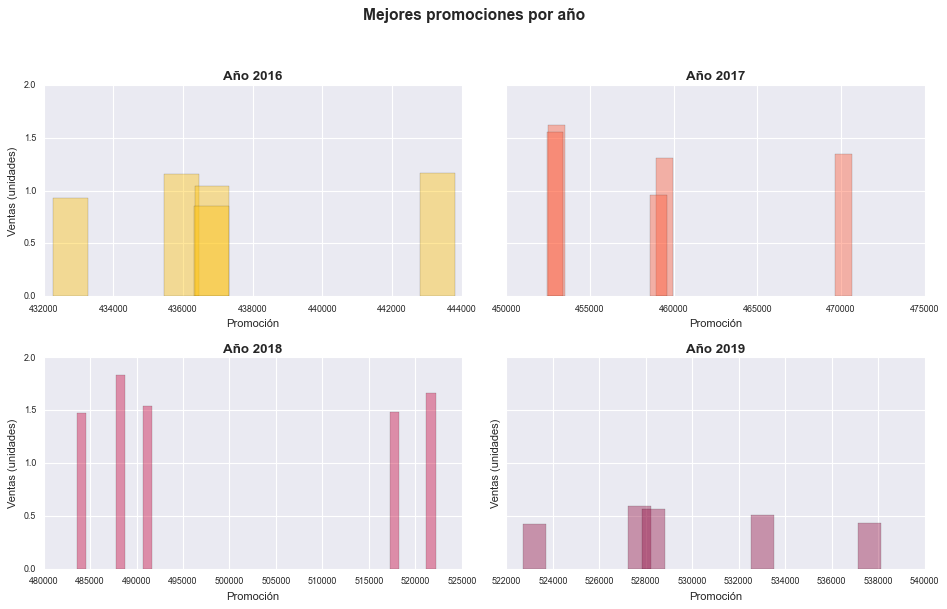

In [438]:
import matplotlib.pyplot as plt

# Cargar los datos
datos_2016 = df_mejor_promo_2016_2
datos_2017 = df_mejor_promo_2017_2
datos_2018 = df_mejor_promo_2018_2
datos_2019 = df_mejor_promo_2019_2

# Crear el panel de gráficos
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(12, 8), sharey=True)

# Definir los colores para cada gráfico
colores = ['#FFC107', '#FF5733', '#C70039', '#900C3F']

# Definir los títulos y etiquetas de los ejes
titulo = 'Mejores promociones por año'
titulo_x = 'Promoción'
titulo_y = 'Ventas (unidades)'

ancho_barras = 10 / len(datos_2016['nro_prom'])

# Gráfico 1
axs[0, 0].bar(datos_2016['nro_prom'], datos_2016['venta_unidades'], color=colores[0], width=1000, alpha=0.4)
axs[0, 0].set_title('Año 2016', fontsize=12, fontweight='bold')
axs[0, 0].set_xlabel(titulo_x, fontsize=10)
axs[0, 0].set_ylabel(titulo_y, fontsize=10)
axs[0, 0].tick_params(axis='both', labelsize=8)
axs[0, 0].spines['right'].set_visible(False)
axs[0, 0].spines['top'].set_visible(False)

# Gráfico 2
axs[0, 1].bar(datos_2017['nro_prom'], datos_2017['venta_unidades'], color=colores[1], width=1000, alpha=0.4)
axs[0, 1].set_title('Año 2017', fontsize=12, fontweight='bold')
axs[0, 1].set_xlabel(titulo_x, fontsize=10)
axs[0, 1].tick_params(axis='both', labelsize=8)
axs[0, 1].spines['right'].set_visible(False)
axs[0, 1].spines['top'].set_visible(False)

# Gráfico 3
axs[1, 0].bar(datos_2018['nro_prom'], datos_2018['venta_unidades'], color=colores[2], width=1000, alpha=0.4)
axs[1, 0].set_title('Año 2018', fontsize=12, fontweight='bold')
axs[1, 0].set_xlabel(titulo_x, fontsize=10)
axs[1, 0].set_ylabel(titulo_y, fontsize=10)
axs[1, 0].tick_params(axis='both', labelsize=8)
axs[1, 0].spines['right'].set_visible(False)
axs[1, 0].spines['top'].set_visible(False)

# Gráfico 4
axs[1, 1].bar(datos_2019['nro_prom'], datos_2019['venta_unidades'], color=colores[3], width=1000, alpha=0.4)
axs[1, 1].set_title('Año 2019', fontsize=12, fontweight='bold')
axs[1, 1].set_xlabel(titulo_x, fontsize=10)
axs[1, 1].set_ylabel(titulo_y, fontsize=10)
axs[1, 1].tick_params(axis='both', labelsize=8)
axs[1, 1].spines['right'].set_visible(False)
axs[1, 1].spines['top'].set_visible(False)

#Ajustar el espacio entre los gráficos y el título
fig.suptitle(titulo, fontsize=14, fontweight='bold')
fig.tight_layout(rect=[0, 0.03, 1, 0.95])

plt.savefig(f'images/Mejores_promociones_por_año', dpi=300, bbox_inches='tight')
#Mostrar el panel de gráficos
plt.show()

#### Por zonas

ZONA 1

In [439]:

df_zona1 = df[(df['zona']==1)]


In [440]:
ventas_promo_z1 = df_zona1.loc[df['tiene_promo']==1, 'venta_unidades'].mean()

print("La media de ventas de productos con promoción en la zona 1 es:", ventas_promo_z1)

La media de ventas de productos con promoción en la zona 1 es: 0.5497872340425531


In [442]:
ventas_sin_promo_z1 = df_zona1.loc[df['tiene_promo']==0, 'venta_unidades'].mean()

df_promo_zona2 = df[(df['tiene_promo'] == 1) & (df['zona']==2)]

print("La media de ventas de productos con promoción en la zona 1 es:", ventas_sin_promo_z1)

La media de ventas de productos con promoción en la zona 1 es: 0.2093276922059893


In [443]:
df_promo_zona1 = df[(df['tiene_promo'] == 1) & (df['zona']==1)]
df_mejor_promo_z1 = df_promo_zona1.groupby('nro_prom')['venta_unidades'].mean().reset_index()
df_mejor_promo_z1 = df_mejor_promo_z1.sort_values(by='venta_unidades', ascending=False)

df_mejor_promo_zona1=df_mejor_promo_z1.head(5)

df_mejor_promo_zona1

,nro_prom,venta_unidades
3,436830,1.005208
9,459100,0.944444
6,449953,0.872222
12,491204,0.718750
0,425200,0.687500


ZONA 2

In [178]:
df_zona2 = df[(df['zona']==2)]

In [444]:
ventas_promo_z2 = df_zona2.loc[df['tiene_promo']==1, 'venta_unidades'].mean()

print("La media de ventas de productos con promoción en la zona 2 es:", ventas_promo_z2)

La media de ventas de productos con promoción en la zona 2 es: 0.49507319819819817


In [445]:
ventas_sin_promo_z2 = df_zona2.loc[df['tiene_promo']==0, 'venta_unidades'].mean()

print("La media de ventas de productos con promoción en la zona 2 es:", ventas_sin_promo_z2)

La media de ventas de productos con promoción en la zona 2 es: 0.23620915006753365


In [446]:
df_promo_zona2 = df[(df['tiene_promo'] == 1) & (df['zona']==2)]

df_mejor_promo_z2 = df_promo_zona2.groupby('nro_prom')['venta_unidades'].mean().reset_index()
df_mejor_promo_z2 = df_mejor_promo_z2.sort_values(by='venta_unidades', ascending=False)

df_mejor_promo_zona2=df_mejor_promo_z2.head(5)

df_mejor_promo_zona2

,nro_prom,venta_unidades
13,459100,0.944444
0,425200,0.835417
4,432776,0.831250
5,436830,0.807432
8,449953,0.742105


ZONA 3

In [447]:
df_zona3 = df[(df['zona']==3)]

In [448]:
ventas_promo_z3 = df_zona3.loc[df['tiene_promo']==1, 'venta_unidades'].mean()

print("La media de ventas de productos con promoción en la zona 3 es:", ventas_promo_z3)

La media de ventas de productos con promoción en la zona 3 es: 0.6791942446043165


In [449]:
ventas_sin_promo_z3 = df_zona3.loc[df['tiene_promo']==0, 'venta_unidades'].mean()

print("La media de ventas de productos con promoción en la zona 3 es:", ventas_sin_promo_z3)

La media de ventas de productos con promoción en la zona 3 es: 0.3163572886453969


In [450]:
df_promo_zona3 = df[(df['tiene_promo'] == 1) & (df['zona']==3)]

df_mejor_promo_z3 = df_promo_zona3.groupby('nro_prom')['venta_unidades'].mean().reset_index()
df_mejor_promo_z3 = df_mejor_promo_z3.sort_values(by='venta_unidades', ascending=False)
df_mejor_promo_zona3 = df_mejor_promo_z3.astype({'nro_prom': 'category'})
df_mejor_promo_zona3=df_mejor_promo_z3.head(5)

df_mejor_promo_zona3

,nro_prom,venta_unidades
37,488290,1.836601
10,436833,1.708333
8,435968,1.604938
35,484088,1.478261
9,436830,1.363372


ZONA 4

In [184]:
df_zona4 = df[(df['zona']==4)]

In [451]:
ventas_promo_z4 = df_zona4.loc[df['tiene_promo']==1, 'venta_unidades'].mean()

print("La media de ventas de productos con promoción en la zona 4 es:", ventas_promo_z4)

La media de ventas de productos con promoción en la zona 4 es: 0.5244926490072276


In [452]:
ventas_sin_promo_z4 = df_zona4.loc[df['tiene_promo']==0, 'venta_unidades'].mean()

print("La media de ventas de productos con promoción en la zona 4 es:", ventas_sin_promo_z4)

La media de ventas de productos con promoción en la zona 4 es: 0.32049170872627514


In [453]:
df_promo_zona4 = df[(df['tiene_promo'] == 1) & (df['zona']==4)]

df_mejor_promo_z4 = df_promo_zona4.groupby(['nro_prom'])['venta_unidades'].mean().reset_index()
df_mejor_promo_z4 = df_mejor_promo_z4.sort_values(by='venta_unidades', ascending=False)

df_mejor_promo_zona4 = df_mejor_promo_z4.astype({'nro_prom': 'category'})
df_mejor_promo_zona4=df_mejor_promo_z4.head(5)
df_mejor_promo_zona4


,nro_prom,venta_unidades
88,521675,1.659664
35,452976,1.621429
34,452913,1.551948
65,491206,1.544192
86,517727,1.486111


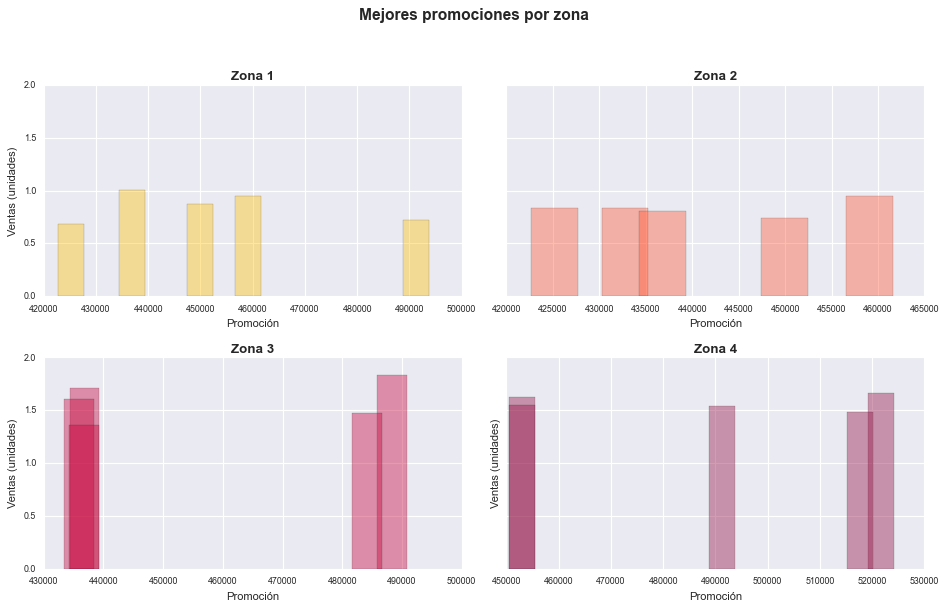

In [454]:
# Cargar los datos
zona1 = df_mejor_promo_zona1
zona2 = df_mejor_promo_zona2
zona3 = df_mejor_promo_zona3
zona4 = df_mejor_promo_zona4

# Crear el panel de gráficos
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(12, 8), sharey=True)

# Definir los colores para cada gráfico
colores = ['#FFC107', '#FF5733', '#C70039', '#900C3F']

# Definir los títulos y etiquetas de los ejes
titulo = 'Mejores promociones por zona'
titulo_x = 'Promoción'
titulo_y = 'Ventas (unidades)'

# Gráfico 1
axs[0, 0].bar(zona1['nro_prom'], zona1['venta_unidades'], color=colores[0], width=5000, alpha=0.4)
axs[0, 0].set_title('Zona 1', fontsize=12, fontweight='bold')
axs[0, 0].set_xlabel(titulo_x, fontsize=10)
axs[0, 0].set_ylabel(titulo_y, fontsize=10)
axs[0, 0].tick_params(axis='both', labelsize=8)
axs[0, 0].spines['right'].set_visible(False)
axs[0, 0].spines['top'].set_visible(False)

# Gráfico 2
axs[0, 1].bar(zona2['nro_prom'], zona2['venta_unidades'], color=colores[1], width=5000, alpha=0.4)
axs[0, 1].set_title('Zona 2', fontsize=12, fontweight='bold')
axs[0, 1].set_xlabel(titulo_x, fontsize=10)
axs[0, 1].tick_params(axis='both', labelsize=8)
axs[0, 1].spines['right'].set_visible(False)
axs[0, 1].spines['top'].set_visible(False)

# Gráfico 3
axs[1, 0].bar(zona3['nro_prom'], zona3['venta_unidades'], color=colores[2], width=5000, alpha=0.4)
axs[1, 0].set_title('Zona 3', fontsize=12, fontweight='bold')
axs[1, 0].set_xlabel(titulo_x, fontsize=10)
axs[1, 0].set_ylabel(titulo_y, fontsize=10)
axs[1, 0].tick_params(axis='both', labelsize=8)
axs[1, 0].spines['right'].set_visible(False)
axs[1, 0].spines['top'].set_visible(False)

# Gráfico 4
axs[1, 1].bar(zona4['nro_prom'], zona4['venta_unidades'], color=colores[3], width=5000, alpha=0.4)
axs[1, 1].set_title('Zona 4', fontsize=12, fontweight='bold')
axs[1, 1].set_xlabel(titulo_x, fontsize=10)
axs[1, 1].set_ylabel(titulo_y, fontsize=10)
axs[1, 1].tick_params(axis='both', labelsize=8)
axs[1, 1].spines['right'].set_visible(False)
axs[1, 1].spines['top'].set_visible(False)

#Ajustar el espacio entre los gráficos y el título
fig.suptitle(titulo, fontsize=14, fontweight='bold')
fig.tight_layout(rect=[0, 0.03, 1, 0.95])

plt.savefig(f'images/Mejores_promociones_por_zona', dpi=300, bbox_inches='tight')

#Mostrar el panel de gráficos
plt.show()

In [35]:
# Crear un DataFrame con los datos
datos = pd.DataFrame({
    'año': [2016, 2016, 2017, 2017, 2018, 2018, 2019, 2019],
    'tiene_promo': [1, 0, 1, 0, 1, 0, 1, 0],
    'media_venta_unidades': [0.5876546295139323, 0.3749595907222985, 0.5322266681085758, 0.40503376994957796, 0.6447172909986705, 0.2919536117507041, 0.4250734573947111, 0.1972164725278358]
})
datos

,año,tiene_promo,media_venta_unidades
0,2016,1,0.587655
1,2016,0,0.374960
2,2017,1,0.532227
3,2017,0,0.405034
4,2018,1,0.644717
5,2018,0,0.291954
6,2019,1,0.425073
7,2019,0,0.197216


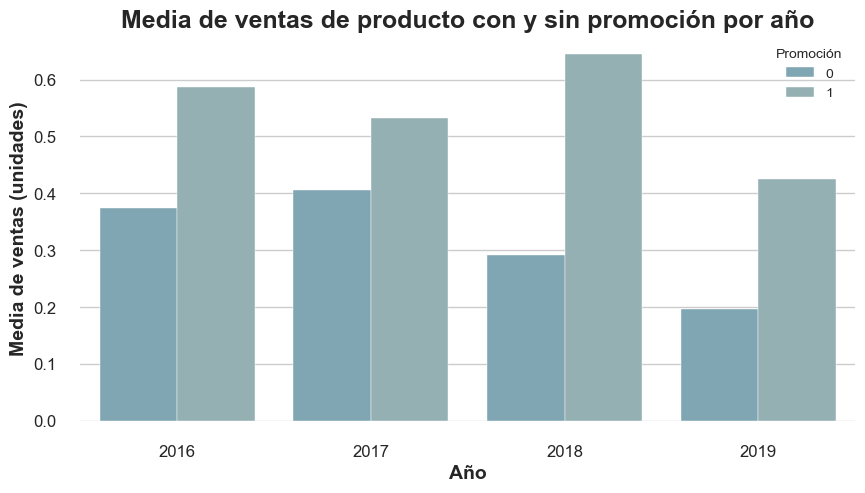

In [46]:
plt.figure(figsize=[10,5])
with sns.axes_style("whitegrid"):
    ax = sns.barplot(x='año', y='media_venta_unidades', hue='tiene_promo', data=datos)
    sns.despine(offset=10, trim=True)
    color = "blend:#7AB,#EDA"
    sns.set_palette(sns.color_palette(color))
    plt.title('Media de ventas de producto con y sin promoción por año', fontsize=18, fontweight='bold')
    plt.xlabel('Año', fontsize=14, fontweight='bold')
    plt.ylabel('Media de ventas (unidades)', fontsize=14, fontweight='bold')
    plt.legend(title='Promoción')
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    plt.savefig(f'images/Media_ventas_por_año_con_y_sin_promoción', dpi=300, bbox_inches='tight')
plt.show()

In [37]:
# Crear un DataFrame con los datos
data = pd.DataFrame({
    'zona': ['Zona 1', 'Zona 1', 'Zona 2', 'Zona 2', 'Zona 3', 'Zona 3', 'Zona 4', 'Zona 4'],
    'tiene_promo': [1, 0, 1, 0, 1, 0, 1, 0],
    'media_venta_unidades': [0.5497872340425531, 0.2093276922059893, 0.49507319819819817, 0.23620915006753365, 0.6791942446043165, 0.3163572886453969,  0.5244926490072276, 0.32049170872627514
]
})
data

,zona,tiene_promo,media_venta_unidades
0,Zona 1,1,0.549787
1,Zona 1,0,0.209328
2,Zona 2,1,0.495073
3,Zona 2,0,0.236209
4,Zona 3,1,0.679194
5,Zona 3,0,0.316357
6,Zona 4,1,0.524493
7,Zona 4,0,0.320492


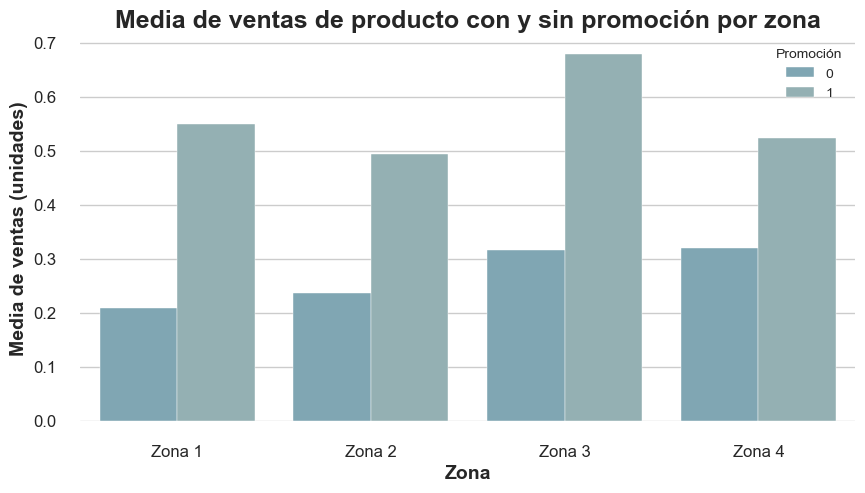

In [45]:
plt.figure(figsize=[10,5])
with sns.axes_style("whitegrid"):
    ax = sns.barplot(x='zona', y='media_venta_unidades', hue='tiene_promo', data=data)
    sns.despine(offset=10, trim=True)
    color = "blend:#7AB,#EDA"
    sns.set_palette(sns.color_palette(color))
    plt.title('Media de ventas de producto con y sin promoción por zona', fontsize=18, fontweight='bold')
    plt.xlabel('Zona', fontsize=14, fontweight='bold')
    plt.ylabel('Media de ventas (unidades)', fontsize=14, fontweight='bold')
    plt.legend(title='Promoción')
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    plt.savefig(f'images/Media_ventas_por_zona_con_y_sin_promoción', dpi=300, bbox_inches='tight')
plt.show()

| **FASES**                                                             | **SEMANAS** |
|-----------------------------------------------------------------------|-------------|
| **Fase de Preparación**                                               | **1 - 4**   |
| Definición de los objetivos del proyecto y los requisitos del cliente | 1 - 2       |
| Adquisición y exploración del dataset                                 | 3 - 4       |
|**Fase de Desarrollo**                                                 | **5 - 10**  |
| Selección y ajuste de un modelo de machine learning                   | 5 - 6       |
|  Entrenamiento y evaluación del modelo                                | 7 - 8       |
|  Implementación y ajuste final del modelo en la plataforma            | 9 - 10      |
|  **Fase de Despliegue**                                               | **11 - 15** |
|  Pruebas finales del modelo y preparación para la entrega             | 11 - 12     |
| Implementación del modelo y la plataforma en el entorno de producción | 13          |
|  Pruebas y ajustes finales                                            | 14 - 15     |

In [487]:
ventas_outliers = df[(df['venta_unidades']>=20) & (df['tiene_promo']==1)]
ventas_outliers

,idb,id_producto,fecha_trans,stock_unidades,venta_unidades,precio_unitario,sigue_prod_en_rol,cd_abast,mov_month,mov_year,...,local,punto_dist,desc_producto,razon_social,id_region,dia_semana,is_weekend,tiene_promo,estacion,zona
6189998,9636,242232,2016-10-26,25,21,15.82,1,0,10,2016,...,1,0,poett ambiental bebe nuevo d 0.377 kg,clorox argentina s.a.,1,Wednesday,0,1,otono,4
8264524,9231,342686,2018-01-11,29,20,21.14,1,9217,1,2018,...,1,0,glade desodorante de ambientes lavander nueva ...,s. c. johnson y son de arg. s.a.,1,Thursday,0,1,invierno,3


División por zonas

In [40]:
ventas_por_zona = df.groupby(['zona'])['venta_unidades'].mean().reset_index().sort_values(by='venta_unidades', ascending=False)
ventas_por_zona

,zona,venta_unidades
3,4,0.323829
2,3,0.323005
1,2,0.239806
0,1,0.215813


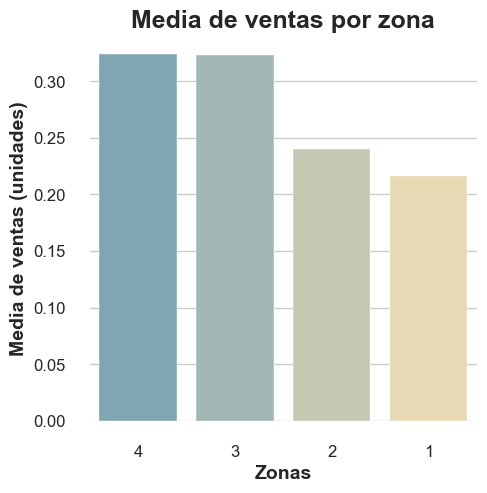

In [43]:
plt.figure(figsize=[5,5])
with sns.axes_style("whitegrid"):
            ax= sns.barplot(x='zona', y='venta_unidades', data=ventas_por_zona, 
            order=ventas_por_zona.sort_values('venta_unidades', ascending=False)['zona'], palette=color)
            sns.despine(offset=10, trim=True)
            plt.title('Media de ventas por zona', fontsize=18, fontweight='bold')
            plt.xlabel('Zonas', fontsize=14, fontweight='bold')
            plt.ylabel('Media de ventas (unidades)', fontsize=14, fontweight='bold')
            plt.xticks(fontsize=12)
            plt.yticks(fontsize=12)
            plt.savefig(f'images/Media_de_ventas_por_zona', dpi=300, bbox_inches='tight')
plt.show()